# **Customer Personality Analysis**
Oleh: A.A. Putu Sandra

#**1. Pendahuluan**

###**1.1 Latar Belakang**

*Customer Personality Analysis* berikut ini adalah upaya perusahaan menggunakan data transaksi yang dikumpulkan selama dua tahun (antara 2012-2014) untuk melihat karakteristik pelanggan serta hubungannya terhadap perilaku belanja pelanggan pada masing-masing produk yang ditawarkan dan *campaign* yang dilakukan. Data disusun berdasarkan strategi *marketing* 4P: *People, Product, Promotion and Place.*

Hasil dari analisa ini diharapkan mampu memberi gambaran bagi  perusahaan mengenai kinerja *campaign* yang telah dilakukan. Serta memberi insight dalam menyusun perencanaan *marketing campaign* yang efektif dan efisien di masa depan. 





###**1.2 Rumusan Masalah**

Perusahaan ingin memaksimalkan *marketing campaign* produk agar tepat sasaran sesuai kelompok pelanggan yang berpeluang besar untuk melakukan transaksi. Selain itu, menerapkan strategi diskon dan beriklan melalui platform/pendekatan yang paling efektif berdasarkan demografi pelanggan. Baik melalui online maupun offline marketing. Data analyst membuat usulan berdasarkan pertanyaan berikut:

1. Bagaimana karakteristik pelanggan secara umum dalam dua tahun terakhir?
2. Bagaimana gambaran segmen pelanggan yang memiliki pendapatan tertinggi? Adakah hubungan antara kelas pendapatan dengan total pengeluaran?
3. Bagaimana gambaran segmen pelanggan yang melakukan transaksi lebih banyak?
4. Apa jenis produk dengan penjualan tertinggi dalam dua tahun terakhir? Seperti apa segmen pelanggan yang terbanyak membeli produk tersebut?
5. Bagaimana hubungan antara status pernikahan, jumlah anak, serta pengeluaran?
6. Bagaimana proporsi penjualan di masing-masing lini penawaran (web, store, catalog)? 
7. Berapa persen campaign direspon oleh pelanggan dan terkonversi menjadi transaksi? Segmen pelanggan seperti apa yang paling banyak merespon?
8. Bagaimana hubungan antara lini penawaran produk dengan kelompok usia dan tingkat pendidikan? 
9. Berapa persen jumlah kunjangan website terkonversi menjadi transaksi?
10. Bagaimana hubungan antara total pengeluaran dan total kampanye yang direspon pelanggan? 
11. Bagaimana gambaran segmen pelanggan yang terbanyak bertransaksi dengan diskon?
12. Bagaimana gambaran pertumbuhan pelanggan baru selama 2 tahun terakhir?
13. Bagaimana kita memperoleh informasi mengenai value dan loyalitas setiap pelanggan terhadap perusahaan?



#**2. Data Understanding and Data Cleaning**



###**2.1 Menampilkan Dataset**

Dataset yang menjadi dasar analisis untuk menjawab rumusan masalah tersebut, dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) 


Dataset mengandung informasi demografi pelanggan dengan berbagai variabel meliputi identitas pelanggan, produk yang dibeli, dan lain sebagainya. Terdapat 29 kolom dalam dataset marketing_campaign, yakni sebagai berikut:

People

* ID: Id unik tiap customer
* Year_Birth: Tahun kelahiran
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan pelanggan per tahun
* Kidhome: Jumlah kanak-kanak yang dimiliki pelanggan
* Teenhome: Jumlah anak remaja yang dimiliki pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan ke perusahaan
* Recency: Jumlah hari sejak pelanggan melakukan transaksi terakhir
* Complain: 1 jika pelanggan melakukan komplain sejak dua tahun terakhir, 0 lainnya

Products

* MntWines: nilai transaksi pembelian produk Wine selama dua tahun terakhir
* MntFruits: nilai transaksi pembelian produk Buah selama dua tahun terakhir
* MntMeatProducts: nilai transaksi pembelian daging selama dua tahun terakhir
* MntFishProducts: nilai transaksi pembelian Ikan selama dua tahun terakhir
* MntSweetProducts: nilai transaksi pembelian Manisan selama dua tahun terakhir
* MntGoldProds: nilai transaksi pembelian Emas selama dua tahun terakhir

Promotion

* NumDealsPurchases: Jumlah pembelian menggunakan diskon
* AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pemasaran ke-1, 0 lainnya
* AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye pemasaran ke-2, 0 lainnya
* AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye pemasaran ke-3, 0 lainnya
* AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye pemasaran ke-4, 0 lainnya
* AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye  pemasaran ke-5, 0 lainnya
* Response: 1 jika pelanggan menerima penawaran di kampanye pemasaran yang terakhir, 0 lainnya

Place

* NumWebPurchases: Jumlah pembelian melalui website perusahaan
* NumCatalogPurchases: Jumlah pembelian melalui katalog
* NumStorePurchases: Jumlah pembelian langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan pada bulan terakhir

Other

* Z_CostContact: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.
* Z_Revenue: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.






In [1]:
#Data Manipulation:
import pandas as pd
import numpy as np
from datetime import date, datetime

#Data Analysis:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Lain-lain:
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import Dataset dari direktori Mac 
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [5]:
# Tampilkan dataset
pd.set_option('display.max_columns', None) #tampilkan semua kolom
df = pd.read_csv('marketing_campaign.csv', delimiter='\t') #pisahkan kolom dengan delimiter tab
df #tampilkan otomatis 5 baris teratas dan terbawah di dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
#Ubah 'Dt_Customer' tipe data string ke datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') 

print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}\n') 
df.info() #tampilkan tipe data

Jumlah baris dataset: 2240
Jumlah kolom dataset: 29

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   

In [7]:
display(df.describe(), df.describe(include='object')) # menampilkan deskripsi statistik

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


Setelah melihat data secara umum, kita mengetahui bahwa:

* Dataset awal ini memiliki 2240 baris dan 29 kolom.
* Jenis data di setiap kolom terbagi menjadi datetime64 (1 fitur), int64 (25 fitur) dan float64 (1 fitur), dan object (3 fitur).
* Terdapat 2 kolom yang tidak relevan untuk analisis, yakni Z_CostContact, dan Z_Revenue
* Terdapat sejumlah kolom yang perlu disederhanakan penamaannya dan perlu diurutkan dengan benar agar mempermudah saat membaca data. Hal ini selanjutnya akan dibahas secara lengkap.

Sebelum melakukan analisis, kita perlu melihat isi dataset secara lebih dalam. Proses ini meliputi pemeriksaan terhadap anomali-anomali yang ada di dalam dataset, untuk selanjutnya ditangani dalam tahapan data cleaning. Anomali tersebut berupa missing value, data duplikat, outlier, dan sebagainya. Setiap anomali yang teridentifikasi akan ditangani dengan langkah-langkah yang sesuai domain knowledge maupun statistik.

###**2.2 Periksa Data Duplikat**

In [8]:
print(f'Jumlah data yang memiliki duplikat: {df.duplicated().sum()}')

Jumlah data yang memiliki duplikat: 0


###**2.3 Unique Value and Missing Value**



In [9]:
dataVal = []

for i in df.columns:
    dataVal.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(2).values
    ])

pd.DataFrame(data=dataVal,columns=['Column','Missing','% Missing','Unique Values', 'Sample of Unique Values'])

,Column,Missing,% Missing,Unique Values,Sample of Unique Values
0,ID,0,0.00,2240,"[6457, 2570]"
1,Year_Birth,0,0.00,59,"[1972, 1963]"
2,Education,0,0.00,5,"[Graduation, 2n Cycle]"
3,Marital_Status,0,0.00,8,"[Married, Married]"
4,Income,24,1.07,1974,"[79205.0, 24570.0]"
5,Kidhome,0,0.00,3,"[0, 1]"
6,Teenhome,0,0.00,3,"[0, 0]"
7,Dt_Customer,0,0.00,663,"[2013-01-09T00:00:00.000000000, 2013-12-09T00:..."
8,Recency,0,0.00,100,"[19, 48]"
9,MntWines,0,0.00,776,"[582, 702]"


Missing value pada dataset ini hanya ada pada kolom Income sebanyak 24 atau 1,07%.
Untuk menangani missing value, terdapat beberapa ketentuan: 

* Jika missing value hanya muncul pada satu variabel dan persentasenya sangat kecil seperti 1,07%, maka dapat dipertimbangkan untuk menghapus missing value tersebut. 
* Jika missing value muncul pada beberapa variabel dan persentase keseluruhannya masih cukup kecil, maka lebih baik mengisi missing value dengan teknik imputasi yang tepat seperti mean, median, modus, regressi, dan sebagainya. 
* Jika missing value muncul pada beberapa variabel dan persentase keseluruhannya sudah cukup besar, misalnya > 5%, maka lebih baik mengisi missing value daripada menghapusnya, agar tidak mengurangi jumlah data yang signifikan dan dapat mempengaruhi kualitas dan akurasi analisis yang akan dilakukan.


In [10]:
# menghapus missing value
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


###**2.4 Hapus Kolom yang Tidak Relevan**

Pada dataset, kolom Z_CostContact dan Z_Revenue berisikan data yang sama di semua baris, hanya 1 baris yang memiliki data berbeda. Sehingga kolom ini tidak relevan dan akan dihapus.

In [11]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


###**2.5 Ubah Nama Kolom**

Kolom di kategori produk perlu diubah namanya agar lebih mudah dibaca saat analisis. Selain itu kolom 'Response' juga perlu diubah menjadi 'AcceptedCmp6' sebab kolom ini berisi info mengenai jumlah pelanggan yang menerima campaign paling akhir  setelah 5 campaign yang dilakukan sebelumnya.

In [12]:
df.rename(columns={'MntWines':'Wines',
                   'MntFruits':'Fruits',
                   'MntMeatProducts':'Meat',
                   'MntFishProducts':'Fish',
                   'MntSweetProducts':'Sweets',
                   'MntGoldProds':'Gold',
                   'Response':'AcceptedCmp6'},
                   inplace=True)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


###**2.6 Periksa Nilai Outlier**

In [13]:
# Mencari kolom yg berisi nilai numerik
numFeature = [fea for fea in df.describe().columns]
len(numFeature)

24

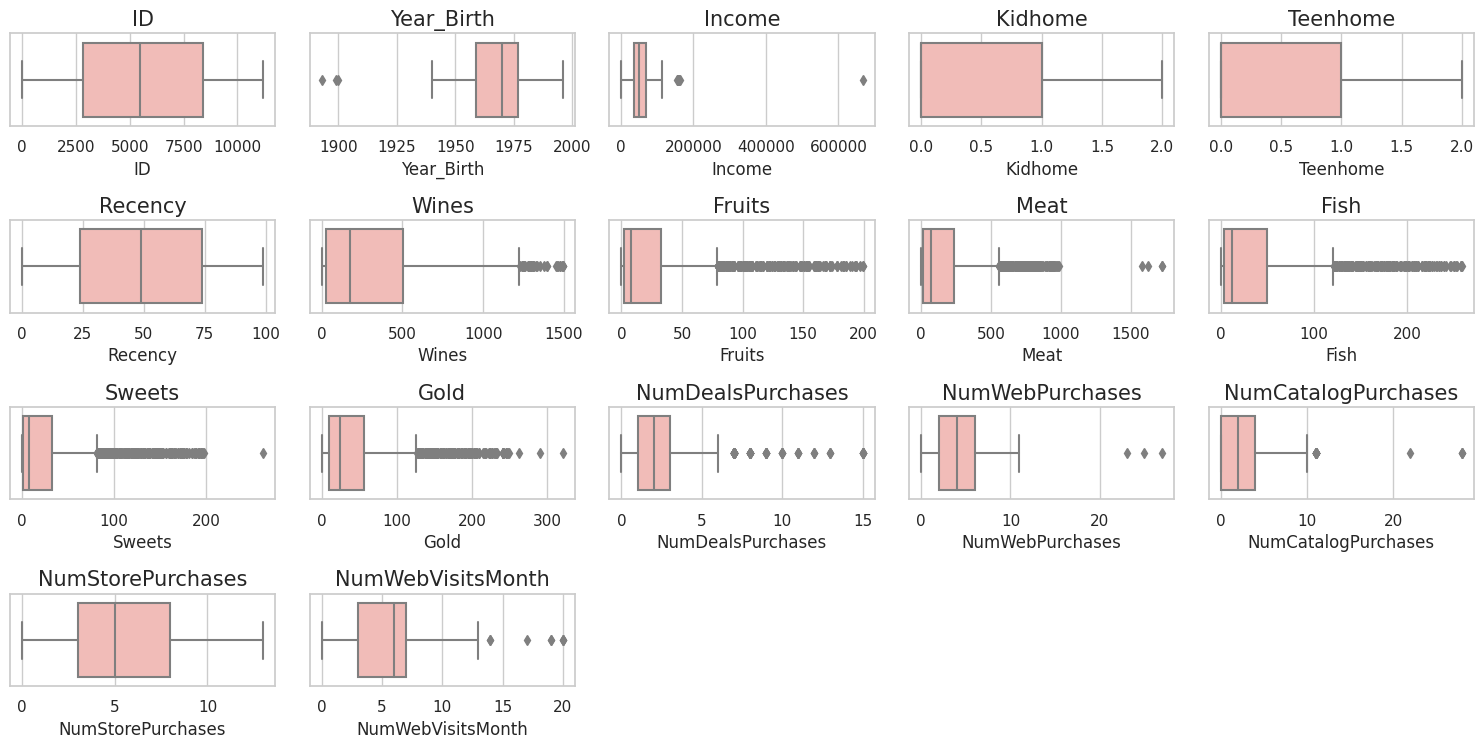

In [14]:
# membuat boxplot untuk melihat outlier, tambahkan syarat hanya kolom dengan unique value >2 agar lebih efisien
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Pastel1')
plotnumber = 1

for feature in numFeature:
    if df[feature].nunique() > 2: 
        ax = plt.subplot(5,5, plotnumber)
        sns.boxplot(x=feature, data=df)
        plt.title(feature, fontsize=15)
        plt.tight_layout()
        plotnumber += 1

In [15]:
# Menampilkan nilai batas bawah (lowerbound) pada 'Year_Birth'

nilaiIQR = df['Year_Birth'].quantile(0.75) - df['Year_Birth'].quantile(0.25)
lowerbound = df['Year_Birth'].quantile(0.25) - (1.5 * nilaiIQR)

print(f'Batas lowerbound pada "Year_Birth" adalah: {int(lowerbound)}\nBerikut ini nilai outlier pada Year Birth:\n')

outlierYearBirth = df[df['Year_Birth'] < lowerbound].tail()
outlierYearBirth

Batas lowerbound pada "Year_Birth" adalah: 1932
Berikut ini nilai outlier pada Year Birth:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [16]:
# Menampilkan nilai batas atas (upperbound) pada 'Income' 

IQR_Income = df['Income'].quantile(0.75)-df['Income'].quantile(0.25)
upper = df['Income'].quantile(0.75) + (1.5*IQR_Income)
print(f'Batas upperbound pada "Income" adalah: {upper}\nBerikut ini nilai outlier pada Income:\n')
outlierIncome = df[df['Income'] > upper].tail(1)
outlierIncome

Batas upperbound pada "Income" adalah: 118350.5
Berikut ini nilai outlier pada Income:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [17]:
# Menampilkan nilai batas atas (upperbound) pada 'Meat'

IQR_Meat = df['Meat'].quantile(0.75)-df['Meat'].quantile(0.25)
upper2 = df['Meat'].quantile(0.75) + (1.5*IQR_Meat)
print(f'Batas upperbound pada "Meat" adalah: {upper2}\nBerikut ini outlier pada Meat:\n')
outlierMeat = df[df['Meat'] > upper].tail()
outlierMeat

Batas upperbound pada "Meat" adalah: 556.625
Berikut ini outlier pada Meat:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6


Dari semua boxplot feature di atas, terdapat beberapa feature yang nampak jelas memiliki nilai outlier. Penjelasan terhadap outlier tersebut yakni sebagai berikut:

* Year_Birth: terdapat 3 data dengan tahun lahir sebelum 1900, yang mana berarti usianya >100 tahun. Hal ini kemungkinan besar karena salah input data, sehingga akan dihapus.
* Income: terdapat 1 data dengan income \$600000 sangat jauh dibanding lainnya. Kemungkinan salah input data, sehingga akan dihapus.
* Meat: terdapat hanya 4 data dengan jumlah belanja daging > \$1500. Setelah diuji ternyata bukan merupakan outlier.
* Sweets: terdapat hanya 1 data dengan jumlah belanja manisan > \$200 dibanding lainnya. Kemungkinan karena salah input data. Setelah diuji dengan cara yang sama seperti pada 'Meat', ternyata bukan merupakan outlier.
* Gold: terdapat hanya 2 data dengan jumlah belanja emas > \$270 dibanding lainnya. Kemungkinan karena salah input data. Setelah diuji dengan cara yang sama seperti pada 'Meat', ternyata bukan merupakan outlier.

In [18]:
#Tampilkan data yang outlier
outliers = df[((df['Income'] > 600000) | (df['Year_Birth'] <= 1932))] 
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [19]:
#Menghapus Outliers
df.drop(outliers.index,inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


###**2.7 Mengelompokkan Data Pada Kolom**




**A. Kolom Year_Birth**



Agar lebih mudah melihat pengaruh usia terhadap pembelian produk dan kinerja marketing campaign, maka kita perlu menggunakan  Year_Birth untuk mendapat informasi usia pelanggan yang diperoleh dari range tahun kelahiran. Pada code di bawah  menunjukkan hasil bahwa usia terkecil yang ada di dataset pelanggan adalah 42. Agar pengelompokkan usia lebih efisien, kita akan berpatokan kepada hasil tersebut dan membuat kategori usia mengacu kepada standar universal, sebagai berikut:

* Adult (26-44 tahun) 
* Middle-Age (45-54 tahun) 
* Older (≥ 55 tahun) 

In [20]:
dataAge = pd.DataFrame({'Year_Birth': [1965, None, 1981]}) #ambil beberapa data tahun yang ada di dataset
# Mencari usia terkecil berpatokan pada tahun terakhir saat data dikumpulkan
min_age = int(2014 - dataAge['Year_Birth'].max())
print("Usia minimal yang ada pada data: ", min_age)


Usia minimal yang ada pada data:  33


In [21]:
# Membuat kolom Age_Segment untuk mengelompokkan usia

df['Year_Birth'] = 2014 - df['Year_Birth']
df.rename(columns={'Year_Birth':'Age'},inplace=True)

def Age_Segment(usia):
    
    if 26 <= usia <= 44:
        return 'Adult'
    elif 45 <= usia <= 54:
        return 'Middle-Age'
    else:
        return 'Older'
        
df['Age_Segment'] = df['Age'].apply(Age_Segment)
df['Age_Segment'] = pd.Categorical(df.Age_Segment, categories=['Adult', 'Middle-Age','Older'])

**B. Kolom Income**

Data pada kolom income perlu dikelompokkan agar lebih mudah melihat pengaruh income terhadap daya beli dan minat pelanggan terhadap produk yang ditawarkan perusahaan, dengan menggunakan 3 kategori berikut:

* Low (nilai Income sampai nilai quantile-25)
* Middle (nilai quantile-25 sampai nilai quantile-75)
* High (nilai quantile-75 ke atas)

In [22]:
# membuat kolom baru untuk mengkategorikan pendapatan
df['Income_Class'] = ['Low' if x <= df['Income'].quantile(0.25)
                      else 'Middle' if x < df['Income'].quantile(0.75)
                      else 'High' for x in df['Income'].values]

# mengubah tipe data kolom Income_Class menjadi categorical
df['Income_Class'] = pd.Categorical(df.Income_Class, categories=['Low', 'Middle', 'High'])


**C. Marital Status**

Kolom ini memiliki 8 variasi nilai, di antaranya ada 3 nilai yang tidak umum: 'Alone', 'YOLO', dan 'Absurd'. 

In [23]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
# Menampilkan baris hanya pada "Marital_Status" yang memiliki value tidak umum: "YOLO", "Absurd", dan "Alone"
df[df['Marital_Status'].isin(['YOLO', 'Absurd', 'Alone'])]

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age_Segment,Income_Class
131,433,56,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,Older,Middle
138,7660,41,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,1,Adult,Middle
153,92,26,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0,Adult,Low
2093,7734,21,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1,Older,High
2134,4369,57,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,Older,Middle
2177,492,41,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,Adult,Middle
2202,11133,41,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1,Adult,Middle


Setelah membandingkan data secara horizontal dengan kolom lain pada baris yang sama, kita akan melihat bahwa Alone tidak lantas berarti 'Single', karena terdapat jumlah anak > 0, sehingga bila kita mengelompokkan tanpa dasar tertentu dapat menimbulkan bias pada data. Berkaitan dengan pemasaran bahan konsumsi rumah tangga, status pelanggan yang memiliki anak, idealnya mesti berbelanja kebutuhan lebih sering atau nilainya lebih besar, selain tentu saja akan dianalisis bersama dengan segmen usia dan income. Kita ingin mengetahui apakah kita berhasil menarik segmen pelanggan tersebut yang secara logika potensial. Sehingga dalam hal ini akan kita tambah kolom Parental_Status yang terdiri dari:

* Non-parent: bukan orang tua
* Parent: orang tua
* Single-parent: orang tua tunggal


In [25]:
# Jenis produk yang kita tawarkan, tidak ada yg memiliki kecenderungan spesifik untuk Kid (5-12 th) dan Teen (13-18 th)
# Sehingga secara umum mereka memiliki kesamaan corak kebutuhan terhadap 6 jenis produk yang dianalisis 
# Gabungkan kolom 'Kidhome' dan 'Teenhome' menjadi 'Num_Children'

df['Num_Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

In [26]:
def transform_parental_status(row):
    if row['Num_Children'] == 0:
        return 'Non-parent'
    elif row['Num_Children'] > 0 and row['Marital_Status'] in ['Divorced', 'Widow']:
        return 'Single-parent'
    else:
        return 'Parent'

df['Parental_Status'] = df.apply(transform_parental_status, axis=1)

**E. Kolom Education**



In [27]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Untuk mengelompokkan data education, kita akan berpatokan pada sistem gelar di US. Di mana '2n Cycle' berarti pendidikan Master. Sementara 'Basic' merupakan associate degree yang masuk dalam kategori Undergraduate. Jika dilihat bersama dengan kolom income pada dataset filtered by Education:'Basic', data pendidikan 'Basic' juga seluruhnya memiliki income 'Low'. Oleh sebab itu, kita golongkan 'Basic' sebagai 'Undergraduate'. Dari 5 value akan disederhanakan menjadi 3 sesuai sistem gelar US:
* Undergraduate: Basic
* Master: Graduation, Master, 2n Cycle
* Doctoral: PhD

In [28]:
# Mengubah kolom Education menjadi Edu_Segment dan mengelompokkan value berdasarkan 'Undergraduate', 'Graduate', dan 'Postgraduate'
def edu_segment(gelar):
    if gelar.lower() == 'basic':
        return 'Undergraduate'
    elif gelar.lower() == 'phd':
        return 'Doctoral'
    else:
        return 'Master'

df.rename(columns={'Education': 'Edu-Segment'}, inplace=True)
df['Edu_Segment'] = df['Edu-Segment'].apply(edu_segment)
df['Edu_Segment'] = pd.Categorical(df['Edu_Segment'], categories=['Undergraduate', 'Master', 'Doctoral'])


###**2.8 Tambah Kolom Lain**

**A. TotalSpent untuk melihat keseluruhan nilai transaksi  produk yang berhasil terjual**



In [29]:
df['TotalSpent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

**B. TotalNumPurchases untuk melihat total keseluruhan jumlah pembelian yang terjadi di ketiga lini transaksi** 


In [30]:
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

**C. Total_AcceptedCmp untuk melihat total campaign yang diterima/mendapat respon pelanggan**

In [31]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp6']

###**2.9 Mengurutkan Kolom**

In [32]:
# Urutkan kolom yang sesuai untuk kebutuhan analisis
df = df[['ID','Age', 'Age_Segment', 'Edu_Segment', 'Marital_Status','Parental_Status', 'Num_Children', 'Income', 'Income_Class',
       'Dt_Customer','Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'TotalSpent', 
       'TotalNumPurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
       'NumDealsPurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp6', 'Total_AcceptedCmp', 'Complain']].reset_index().drop(columns='index').copy()
           
df

,ID,Age,Age_Segment,Edu_Segment,Marital_Status,Parental_Status,Num_Children,Income,Income_Class,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalSpent,TotalNumPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Total_AcceptedCmp,Complain
0,5524,57,Older,Master,Single,Non-parent,0,58138.0,Middle,2012-09-04,58,635,88,546,172,88,88,1617,22,7,8,10,4,3,0,0,0,0,0,1,1,0
1,2174,60,Older,Master,Single,Parent,2,46344.0,Middle,2014-03-08,38,11,1,6,2,1,6,27,4,5,1,1,2,2,0,0,0,0,0,0,0,0
2,4141,49,Middle-Age,Master,Together,Non-parent,0,71613.0,High,2013-08-21,26,426,49,127,111,21,42,776,20,4,8,2,10,1,0,0,0,0,0,0,0,0
3,6182,30,Adult,Master,Together,Parent,1,26646.0,Low,2014-02-10,26,11,4,20,10,3,5,53,6,6,2,0,4,2,0,0,0,0,0,0,0,0
4,5324,33,Adult,Doctoral,Married,Parent,1,58293.0,Middle,2014-01-19,94,173,43,118,46,27,15,422,14,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,47,Middle-Age,Master,Married,Parent,1,61223.0,Middle,2013-06-13,46,709,43,182,42,118,247,1341,16,5,9,3,4,2,0,0,0,0,0,0,0,0
2208,4001,68,Older,Doctoral,Together,Parent,3,64014.0,Middle,2014-06-10,56,406,0,30,0,0,8,444,15,7,8,2,5,7,1,0,0,0,0,0,1,0
2209,7270,33,Adult,Master,Divorced,Non-parent,0,56981.0,Middle,2014-01-25,91,908,48,217,32,12,24,1241,18,6,2,3,13,1,0,0,0,1,0,0,1,0
2210,8235,58,Older,Master,Together,Parent,1,69245.0,High,2014-01-24,8,428,30,214,80,30,61,843,21,3,6,5,10,2,0,0,0,0,0,0,0,0


###**2.10 Simpan Cleaned Data**

Tampilkan dan simpan data yang sudah selesai dibersihkan untuk kemudian dimasukkan ke dalam analisis serta visualisasi Tableu agar  dapat menjawab business question.

In [33]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), (df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc


(2212, 32)


,dataFeatures,dataType,unique,uniqueSample
0,ID,int64,2212,"[4055, 7152]"
1,Age,int64,56,"[74, 38]"
2,Age_Segment,category,3,"['Middle-Age', 'Older'] Categories (3, object)..."
3,Edu_Segment,category,3,"['Master', 'Doctoral'] Categories (3, object):..."
4,Marital_Status,object,8,"[Absurd, Single]"
5,Parental_Status,object,3,"[Non-parent, Parent]"
6,Num_Children,int64,4,"[1, 0]"
7,Income,float64,1970,"[49678.0, 71604.0]"
8,Income_Class,category,3,"['High', 'Middle'] Categories (3, object): ['L..."
9,Dt_Customer,datetime64[ns],662,"[2014-05-22T00:00:00.000000000, 2012-08-19T00:..."


Setelah dilakukan data cleaning and manipulation, berikut adalah gambaran dari dataset terbaru:

* Jumlah baris dataset : 2212 baris
* Jumlah kolom dataset : 32 kolom

Tipe data:
* 3 tipe data 'category'
* 1 tipe data 'datetime64'
* 1 tipe data 'float64'
* 25 tipe data 'int64'
* 2 tipe data 'object'

Selanjutnya dataset akan diexport untuk divisualisasikan ke Tableau, [lihat visualisasi](https://public.tableau.com/shared/K9YHJTYH8?:display_count=n&:origin=viz_share_link)


In [37]:
# Save file untuk visualisasi 
df.to_excel('Capstone2_marketdata.xlsx', index=False)

Dataset telah siap dianalisis untuk menjawab business questions.

# **3. ANALISIS DATA**

Dalam analisis data, rumusan masalah akan dijabarkan ke dalam poin-poin berikut ini: 

3.1 Karakteristik Pelanggan
* Kelompok usia pelanggan
* Background pendidikan pelanggan
* Parental Status dan Marital Status
* Jumlah anak pelanggan
* Distribusi usia pelanggan
* Distribusi total pengeluaran
* Distribusi income pelanggan

3.2 Korelasi
* Matriks korelasi sebagai gambaran umum
* Hubungan antara segmen usia dengan income
* Hubungan antara segmen usia, income, dan total pengeluaran
* Hubungan parental status dengan income dan total pengeluaran
* Hubungan antara total pengeluaran, income, dan jumlah anak

3.3 Marketing Campaign Analysis
* proporsi banyaknya transaksi produk berdasarkan masing-masing lini penawaran 
* Hubungan segmen pendidikan dengan lini penawaran dan campaign yang diterima
* Respon pelanggan terhadap marketing campaign yang telah dilakukan
* Gambaran pertumbuhan pelanggan berdasarkan bulan
* Melihat value dari setiap pelanggan untuk personalisasi target penawaran

### **3.1 Karakteristik Pelanggan**

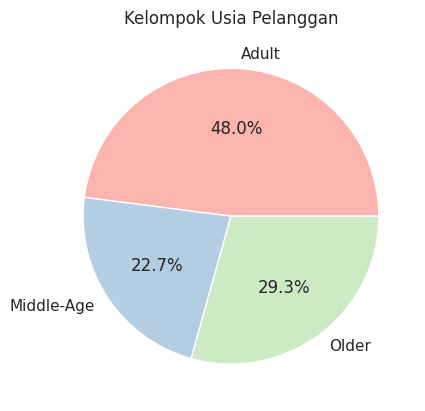

In [34]:
l,a = list(set(df["Age_Segment"])),[]
for i in range(len(l)):
    a.append(df["Age_Segment"].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Kelompok Usia Pelanggan')
plt.show()

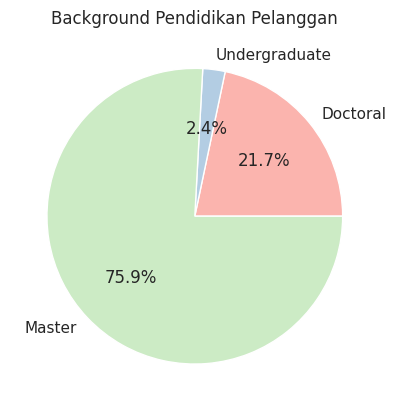

In [48]:
l,a = list(set(df["Edu_Segment"])),[]
for i in range(len(l)):
    a.append(df["Edu_Segment"].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Background Pendidikan Pelanggan')
plt.show()

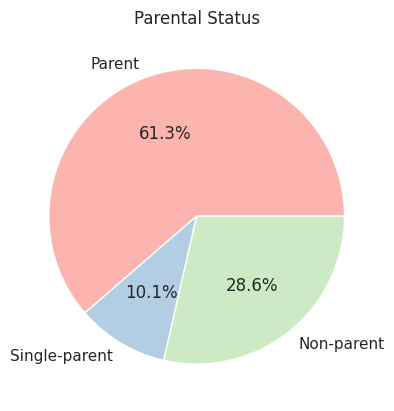

In [47]:
l,a = list(set(df["Parental_Status"])),[]
for i in range(len(l)):
    a.append(df["Parental_Status"].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Parental Status')
plt.show()

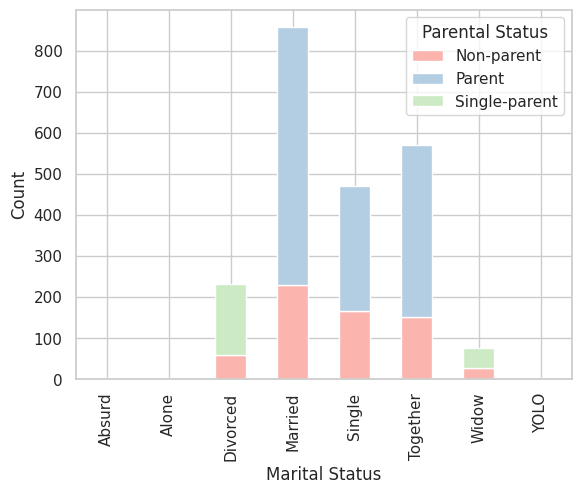

In [37]:
# Parental Status dan Marital Status
countsP = df.groupby(['Marital_Status', 'Parental_Status']).size().unstack()

# Membuat grafik batang
ax = countsP.plot(kind='bar', stacked=True)

# Memberikan label pada sumbu x dan y
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.legend(title='Parental Status', loc='upper right')

plt.show()

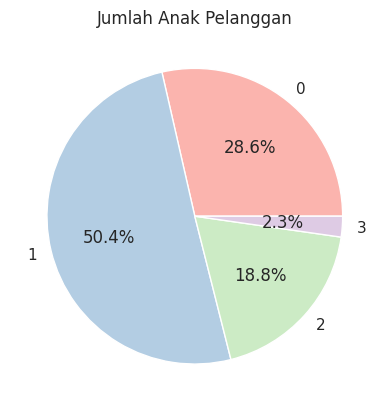

In [38]:
l,a = list(set(df['Num_Children'])),[]
for i in range(len(l)):
    a.append(df['Num_Children'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Jumlah Anak Pelanggan')
plt.show()

Text(0.5, 1.0, 'Distribusi Usia Pelanggan')

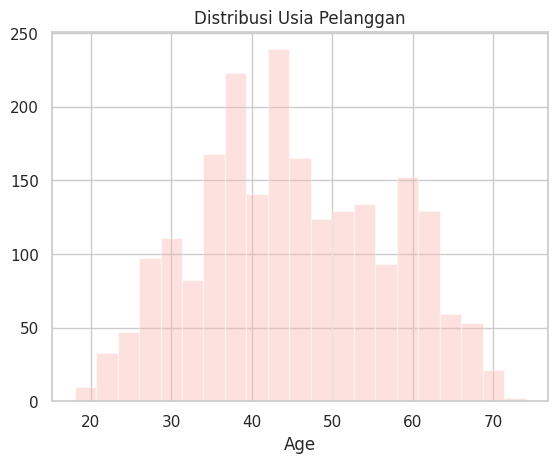

In [39]:
sns.distplot(df['Age'],kde = False)
plt.title('Distribusi Usia Pelanggan')

In [101]:
# cek distribusi data usia
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


Text(0.5, 1.0, 'Distribusi Income Pelanggan')

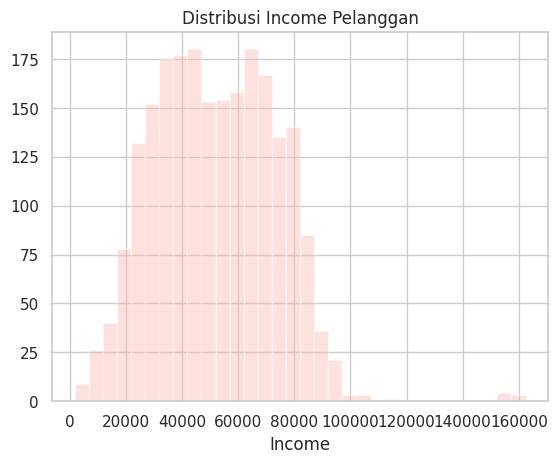

In [40]:
sns.distplot(df['Income'], kde = False)
plt.title('Distribusi Income Pelanggan')

In [39]:
# cek distribusi income
from scipy.stats import normaltest
stats, pval=normaltest(df['Income'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


Data Income pelanggan memiliki 2 puncak atau titik maksimum yang jelas, maka ini menunjukkan bahwa pendapatan tidak terdistribusi secara normal dan dapat dikategorikan sebagai distribusi bimodal. Bimodal  tidak selalu mengindikasikan bahwa populasi terbagi menjadi 2 kelompok secara jelas, dan kadang dapat menjadi hasil dari kombinasi beberapa distribusi yang berbeda. Misalnya, ketika terdapat dua kelompok yang berbeda pada data seperti kelompok usia atau jenis kelamin yang berbeda.

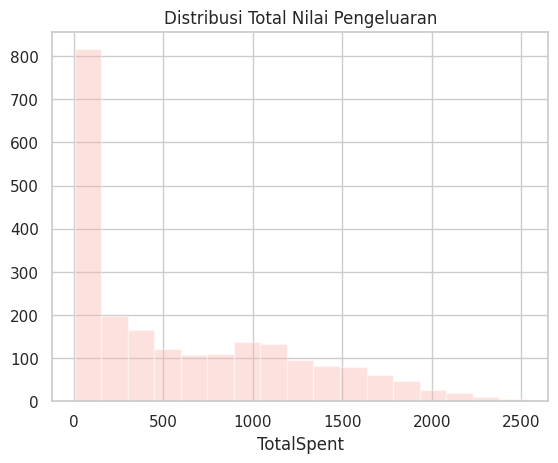

In [41]:
sns.distplot(df['TotalSpent'], kde = False)
plt.title('Distribusi Total Nilai Pengeluaran')
plt.show()

In [105]:
# cek distribusi Total Spent
from scipy.stats import normaltest
stats, pval=normaltest(df['TotalSpent'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


Kemudian kita periksa skewness untuk melihat kemiringan data, apakah data yang dimiliki simetris atau condong ke kanan/kiri.
Nilai antara -0,5 s/d 0,5 artinya simetris.

In [106]:
from scipy.stats import skew
skewness = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skewness['Skew'] = skewness['Feature'].apply(lambda feature: skew(df[feature]))
skewness['Absolute Skew'] = skewness['Skew'].apply(abs)
skewness['Skewed'] = skewness['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skewness

,Feature,Skew,Absolute Skew,Skewed
0,ID,0.041682,0.041682,False
1,Age,0.093344,0.093344,False
2,Num_Children,0.408034,0.408034,False
3,Income,0.347792,0.347792,False
4,Recency,-0.000688,0.000688,False
5,Wines,1.170183,1.170183,True
6,Fruits,2.102437,2.102437,True
7,Meat,2.026188,2.026188,True
8,Fish,1.915259,1.915259,True
9,Sweets,2.101498,2.101498,True


### **3.2 Korelasi Antar Karakteristik**

####**Matriks Korelasi**

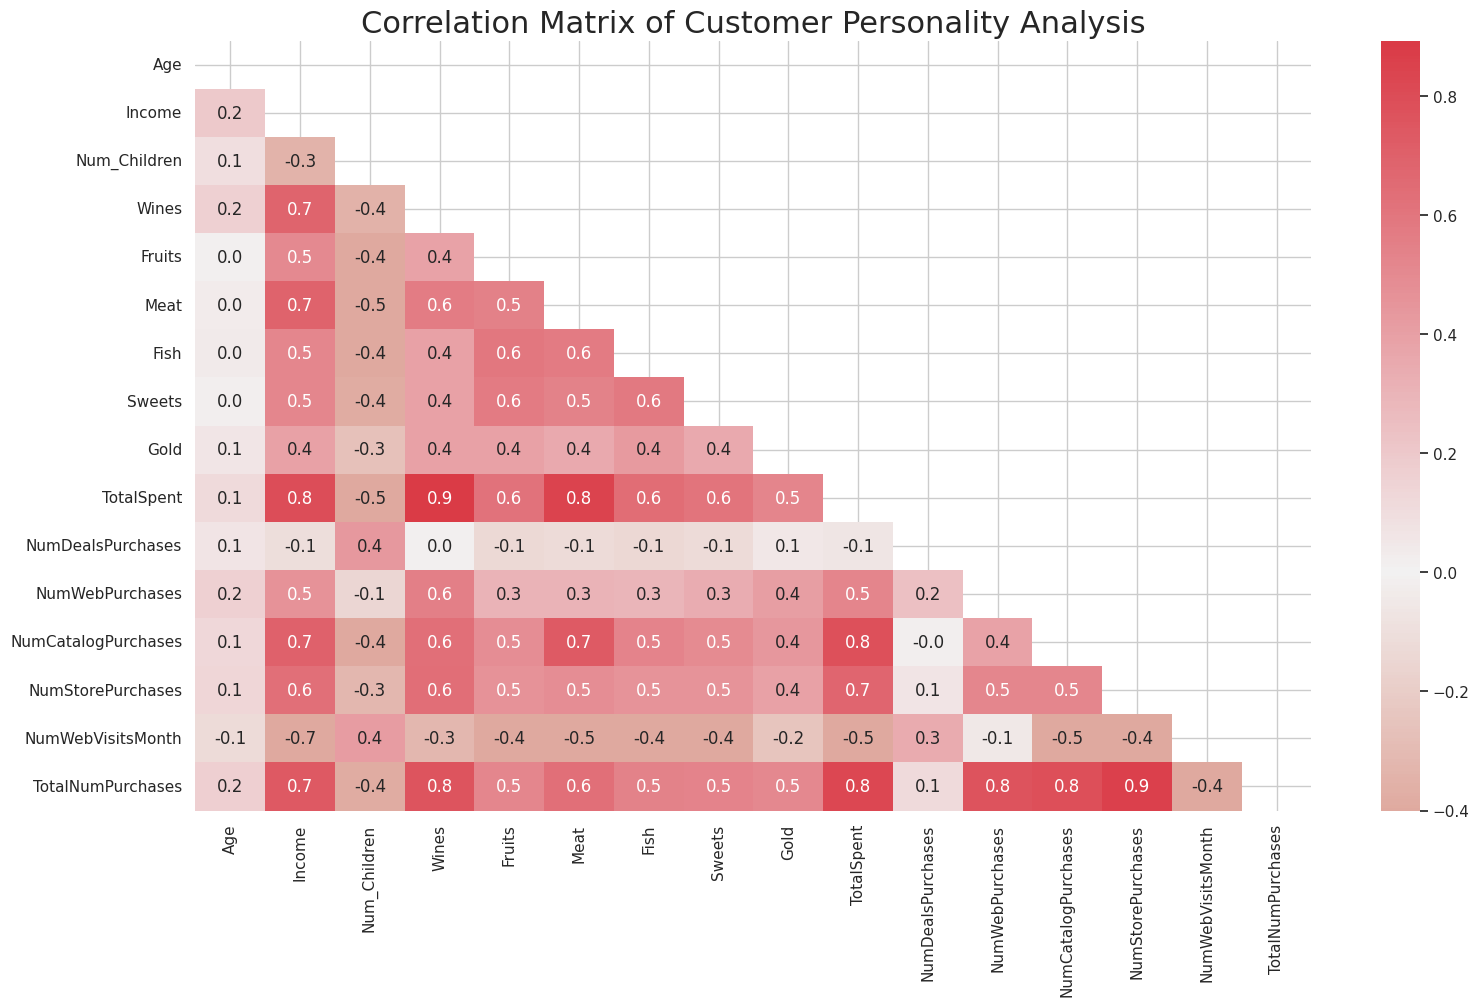

In [41]:
createCorr = ['Age','Income','Num_Children', 'Wines', 'Fruits', 'Meat', 'Fish', 
          'Sweets', 'Gold', 'TotalSpent','NumDealsPurchases','NumWebPurchases', 
          'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','TotalNumPurchases']

cmap = sns.diverging_palette(18, 10, as_cmap=True)
matrix = np.triu(df[createCorr].corr())
plt.figure(figsize=(18, 10))
plt.title('Correlation Matrix of Customer Personality Analysis', fontsize=22)
sns.heatmap(df[createCorr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

Pada matriks ini, secara umum dapat dilihat bahwa :
* Total uang yang dibelanjakan, berhubungan kuat dengan Income
* Produk best-seller adalah wines dan meat. Di mana wines terjual secara imbang di masing-masing lini penawaran, sementara meat terjual paling banyak melalui catalog.
* Nilai transaksi paling banyak berasal dari lini penawaran catalog, sedangkan secara kuantitas jumlah produk yang terjual paling banyak melalui store langsung. 



####**A. Hubungan antara Segmen Usia dan Kelas Pendapatan**

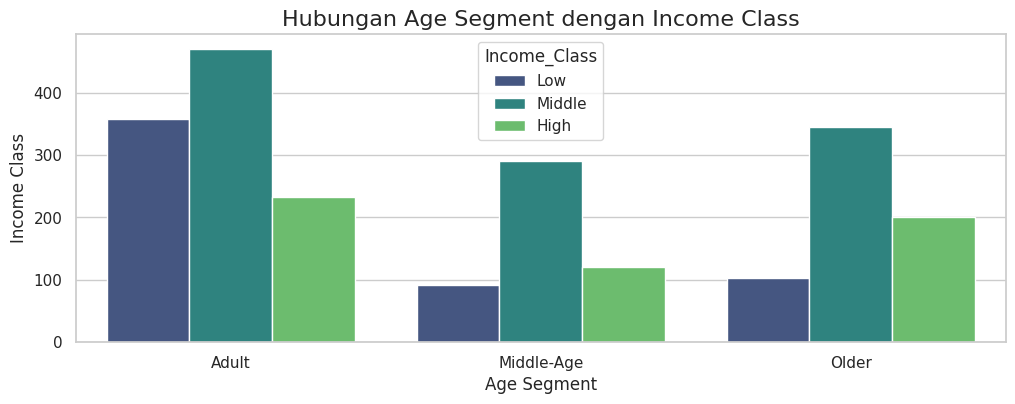

In [94]:
plt.figure(figsize=(12,4))
sns_plot = sns.countplot(x='Age_Segment', hue='Income_Class', data=df, palette='viridis')
plt.title('Hubungan Age Segment dengan Income Class', fontsize=16)
sns_plot.set(xlabel='Age Segment', ylabel='Income Class')

plt.show()

Kita perlu menampilkan median 'Income' berdasarkan 'Age_Segment'. Kemudian mengambil nilai median karena data 'Income' tidak terdistribusi normal (ditampilkan di karakteristik pelanggan). Nilai median diambil sebagai ukuran pusat data.

In [93]:
df.groupby('Age_Segment').median()[['Income']]

,Income
Age_Segment,
Adult,43776.0
Middle-Age,54435.0
Older,58217.0


In [44]:
# - Ho: Median income Middle-Age = Median income Older 
# - Ha: Median income Middle-Age != Median income Older

stat, pvalue = mannwhitneyu(
    df[df['Age_Segment']=='Middle-Age']['Income'],
    df[df['Age_Segment']=='Older']['Income']
)

if pvalue > 0.05:
    print(f'pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK terdapat cukup bukti bahwa median income Middle-Age TIDAK SAMA DENGAN median income Older')
else:
    print(f'pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nTerdapat cukup bukti bahwa median income Middle-Age TIDAK SAMA DENGAN median income Older')


pvalue = 0.003968. pvalue <= 0.05. Reject Ho.
Terdapat cukup bukti bahwa median income Middle-Age TIDAK SAMA DENGAN median income Older


Untuk membuktikan ada/tidaknya keterkaitan (dependency) antara Age_Segment dengan Income_Class, diperlukan analisa menggunakan Chi-Square. Di bawah ini adalah crosstab dari 2 kolom (Age_Segment dan Income_Class). 

**Hipotesis**

Ho: Feature Age_Segment dan Income_Class adalah independent (tidak terkait)

Ha: Feature Age_Segment dan Income_Class adalah dependent (terkait)

In [111]:
df_cross = pd.crosstab(df['Age_Segment'], df['Income_Class'])

In [112]:
stat, pvalue, dof, expected = chi2_contingency(df_cross)
pvalue 

9.49700905552944e-19

In [113]:
if pvalue > 0.05:
    print(f'P-value = {pvalue}. pvalue > 0.05 (alpha). Fail to reject H0.')
else:
    print(f'P-value = {pvalue}. pvalue <= 0.05 (alpha). Reject H0.')

P-value = 9.49700905552944e-19. pvalue <= 0.05 (alpha). Reject H0.


Setelah menarik hubungan antara Age_Segment dengan Income_Class:
* Mayoritas pelanggan kita adalah usia Adult sekitar 40% (lihat pie chart karakteristik berdasarkan usia). Kategori Adult memiliki kelas middle, high, sekaligus low income terbanyak. 
* Mayoritas pelanggan kita adalah kelas middle income. Populasi middle income terbanyak ada pada segmen usia Adult, baru kemudian pelanggan older dan middle age. 
* Dari hasi uji statistik di atas, bisa dilihat bahwa Age_Segment dan Income_Class saling terkait (dependence) atau terdapat hubungan yang signifikan.

####**B. Hubungan Kelas Pendapatan dan Total Pengeluaran Berdasarkan Segmen Usia**

In [50]:
# Menampilkan 'TotalSpent' berdasarkan 'Income_Class' dan 'Age_Segment'
df.groupby('Age_Segment').sum()[['TotalSpent']]

,TotalSpent
Age_Segment,
Adult,561315
Middle-Age,313575
Older,468387


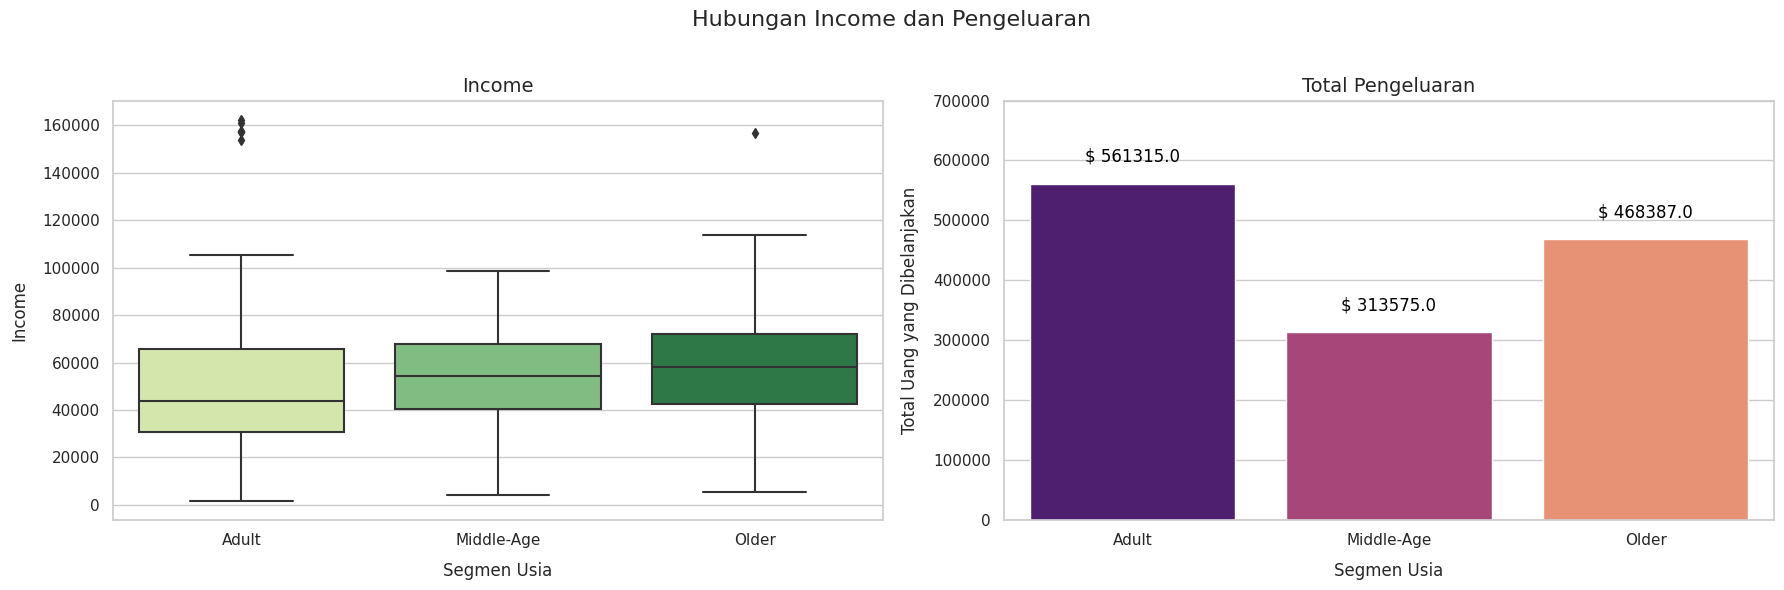

In [92]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Hubungan Income dan Pengeluaran\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Age_Segment', y='Income', palette='YlGn')
plt.title('Income', size=14)
plt.xlabel('Segmen Usia',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x='Age_Segment', y='TotalSpent', palette='magma', ci=0, estimator=sum)
plt.title('Total Pengeluaran', size=14)
plt.xlabel('Segmen Usia',labelpad=10)
plt.ylabel('Total Uang yang Dibelanjakan',labelpad=10)
plt.ylim(0,700000)
for p in ax.patches:
    ax.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+60000), ha='center', va='top', color='black', size=12)

plt.tight_layout();

In [51]:
# Melakukan uji korelasi spearman pada var. 'TotalSpent' vs 'Income'
r = df['TotalSpent'].corr(df['Income'], method='spearman')

def arah_positive (nilai):
    if (nilai <= 0.2):
        return('Hubungan sangat lemah')
    elif (0.2 <= nilai <= 0.4):
        return('Hubungan lemah')
    elif (0.4 <= nilai <= 0.6):
        return('Hubungan moderate')
    elif (0.6 <= nilai <= 0.8):
        return('Hubungan kuat')
    else:
        return('Hubungan sangat kuat')

def hubungan (nilai):
    if nilai < 0:
        return('Korelasi negatif')
    elif nilai > 0:
        return('Korelasi positif')
    else:
        return('Korelasi bernilai 0')

print(f'Hasil Correlation Coefficient (r) TotalSpent vs Income = {r:5f}')
print(f'{hubungan(r)}')
print(f'Nilai {r:5f}: {arah_positive(r)}')

Hasil Correlation Coefficient (r) TotalSpent vs Income = 0.853119
Korelasi positif
Nilai 0.853119: Hubungan sangat kuat


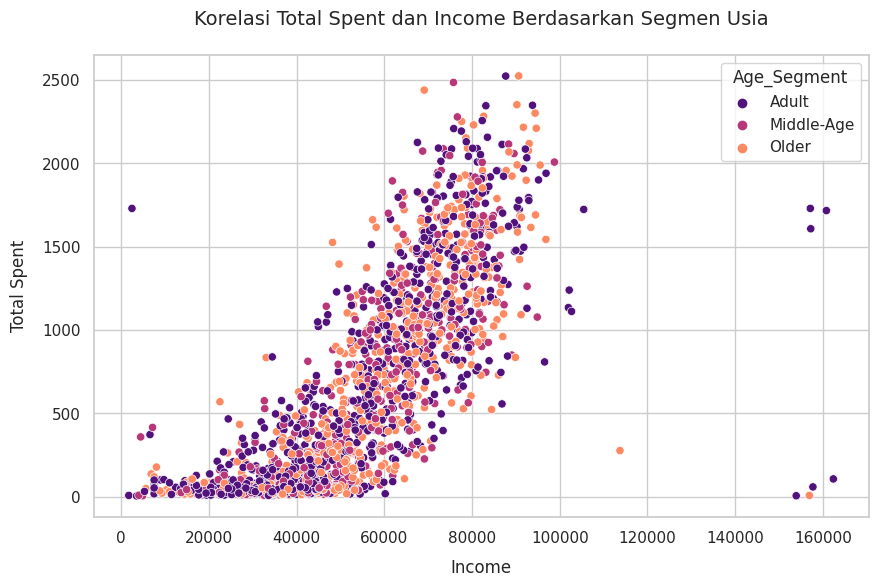

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='TotalSpent', hue='Age_Segment', palette='magma')
plt.title('Korelasi Total Spent dan Income Berdasarkan Segmen Usia\n', size=14)
plt.ylabel('Total Spent', labelpad=10)
plt.xlabel('Income', labelpad=10);

Terlihat korelasi antara Total Spent dan Income adalah hubungan positif (nilai correlation coefficient = 0.853119) dan hubungannya sangat kuat. Sehingga semakin tinggi Income pelanggan dan daya belinya, semakin banyak uang yang dibelanjakan oleh pelanggan.

In [118]:
# hitung average order value
aov = df['TotalSpent'].sum() / df['TotalNumPurchases'].sum()

print('Average Order Value:', aov)

Average Order Value: 48.32279300669113


Rata-rata nilai transaksi yang dilakukan oleh seluruh pelanggan adalah sebesar \$48. Hal ini dapat diartikan bahwa setiap kali pelanggan melakukan transaksi, rata-rata mereka mengeluarkan uang sebesar \$48.

####**C. Hubungan antara Segmen Usia dan Kelas Pendapatan dengan Nilai Transaksi Produk**

In [53]:
# Menampilkan dataframe total spent berdasarkan produk
productName = list(df.iloc[:,11:17].columns)

product_detail_totalspent = pd.DataFrame({
    'Product' : productName,
    'Sales': [df[i].sum() for i in productName]
}).sort_values('Sales',ascending=False)
    
product_detail_totalspent

,Product,Sales
0,Wines,675296
2,Meat,369470
5,Gold,97164
3,Fish,83279
4,Sweets,59827
1,Fruits,58241


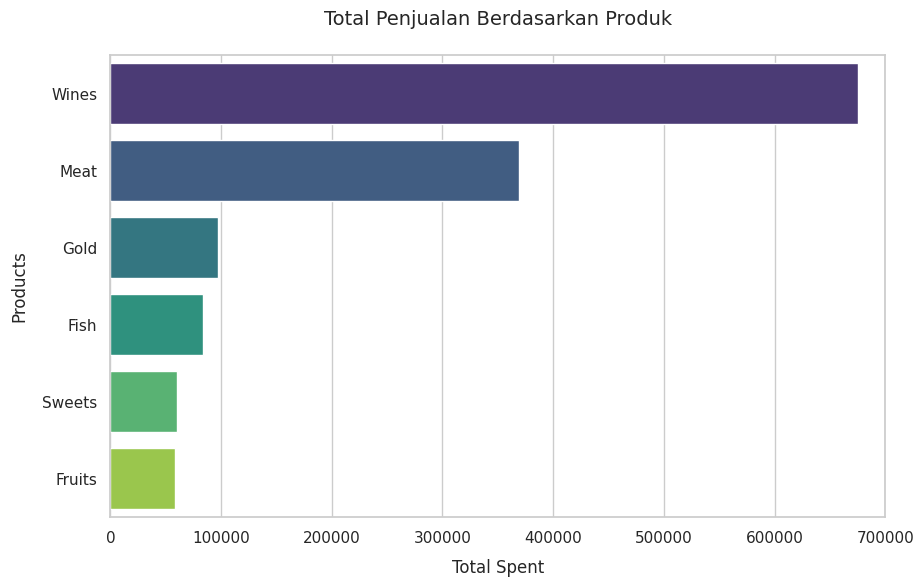

In [54]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=product_detail_totalspent, x='Sales', y='Product', palette='viridis', ci=0)
plt.title('Total Penjualan Berdasarkan Produk\n',size=14)
plt.xlabel('Total Spent',labelpad=10)
plt.ylabel('Products',labelpad=10)
plt.xlim(0,700000);

Berdasarkan jenis produk yang terjual, terlihat bahwa:

* Wine menjadi produk best-seller dengan total penjualan \$675.296.
* Fruits menjadi produk yang paling sedikit dalam transaksi, dengan total penjualan \$58.241.
* Kita akan melihat lebih lanjut total spent atau nilai transaksi  dari masing-masing produk berdasarkan kelompok usianya.

In [55]:
# Menampilkan 'TotalSpent' tiap kelompok usia berdasarkan produk yang dibeli
groupbyProd = df.groupby('Age_Segment').sum().iloc[:,5:11].reset_index()
groupbyProd

,Age_Segment,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Adult,267870,26249,161014,36871,27624,41687
1,Middle-Age,168372,13201,78758,17581,12608,23055
2,Older,239054,18791,129698,28827,19595,32422


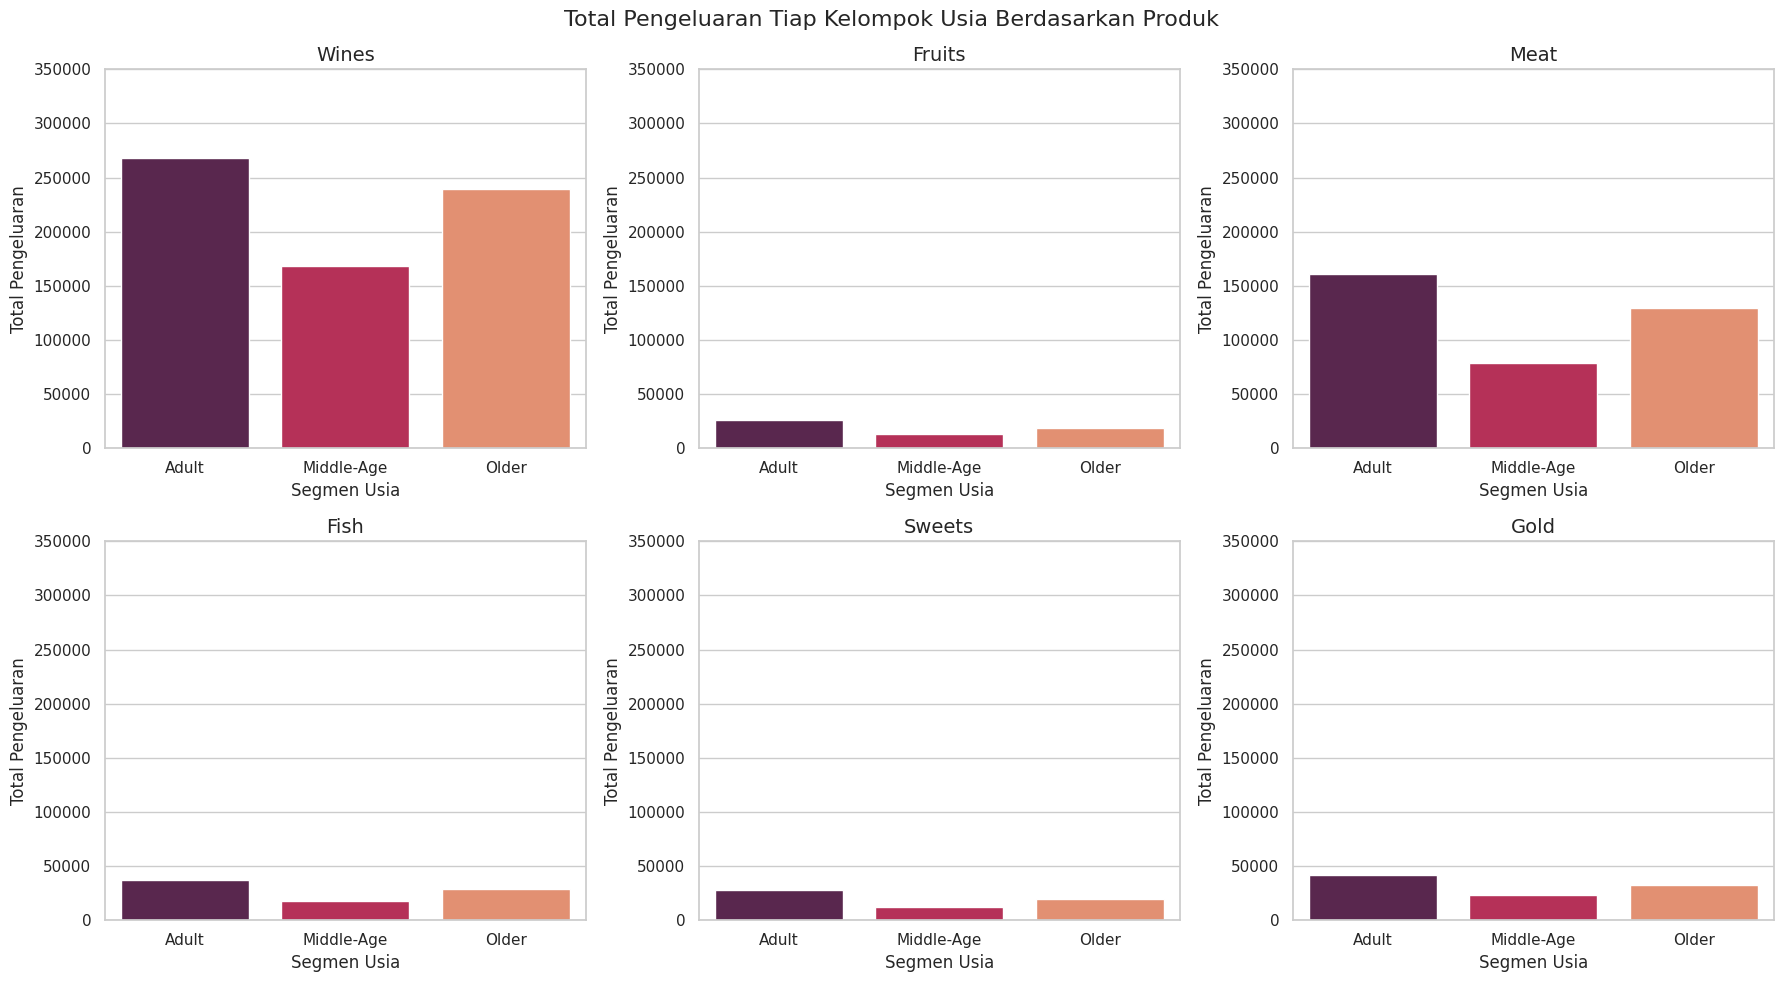

In [56]:
fig = plt.figure(figsize=(18,10))

fig.suptitle('Total Pengeluaran Tiap Kelompok Usia Berdasarkan Produk',size=16)

num_subplot = 1

for i in groupbyProd.iloc[:,1:].columns:
    plt.subplot(2,3,num_subplot)
    sns.barplot(data=groupbyProd, x='Age_Segment', y=i, palette='rocket', estimator=sum)
    plt.title(i,size=14)
    plt.xlabel('Segmen Usia')
    plt.ylabel('Total Pengeluaran')
    plt.ylim(0,350000)
    num_subplot += 1

plt.tight_layout();

Telah diuji  sebelumnya bahwa segmen usia pelanggan memiliki korelasi positif dan hubungan yang kuat dengan income serta  total pengeluaran. 

Bersama dengan grafik ini, dapat disimpulkan bahwa kelompok usia Adult (populasi terbanyak dalam data) memiliki total nilai transaksi terbanyak di masing-masing produk yang terjual. 

####**D. Hubungan Parental Status dengan Income dan Total Pengeluaran**

In [57]:
# Menampilkan persentase tiap kategori Parental_Status
counts = df['Parental_Status'].value_counts()
percentages = counts * 100 / counts.sum()
print(percentages)

Parent           61.347197
Non-parent       28.571429
Single-parent    10.081374
Name: Parental_Status, dtype: float64


In [124]:
# Menampilkan median 'Income' berdasarkan 'Parental_Status'
df.groupby('Parental_Status').median()[['Income']]

,Income
Parental_Status,
Non-parent,72174.5
Parent,44989.0
Single-parent,49638.0


In [58]:
# Menampilkan median 'TotalSpent' berdasarkan dan 'Parental_Status'
df.groupby('Parental_Status').median()[['TotalSpent']]

,TotalSpent
Parental_Status,
Non-parent,1188.5
Parent,185.0
Single-parent,294.0


In [59]:
# Menampilkan median 'NumDealsPurchases' berdasarkan dan 'Parental_Status'
df.groupby('Parental_Status').median()[['TotalNumPurchases']]

,TotalNumPurchases
Parental_Status,
Non-parent,18.0
Parent,8.0
Single-parent,11.0


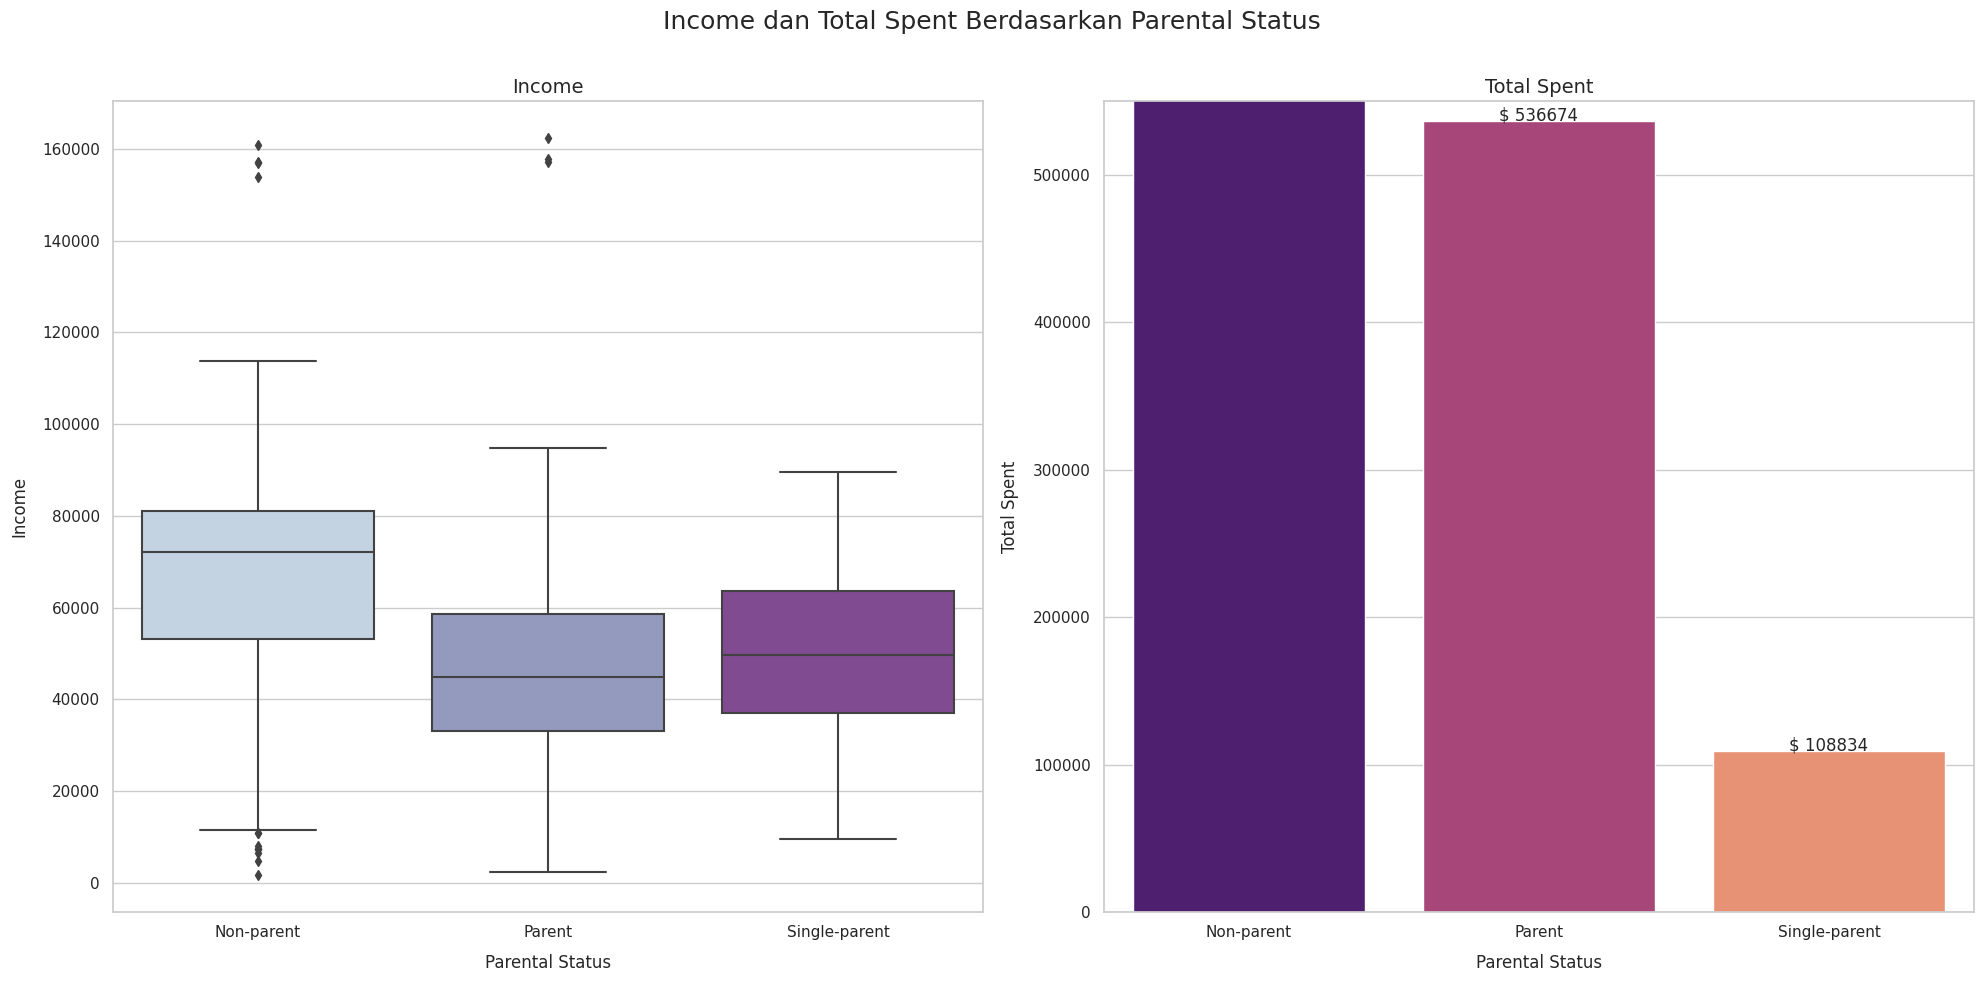

In [60]:
fig = plt.figure(figsize=(20,10))

fig.suptitle('Income dan Total Spent Berdasarkan Parental Status\n', size=18)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Parental_Status', y='Income', palette='BuPu')
plt.title('Income', size=14)
plt.xlabel('Parental Status',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x='Parental_Status', y='TotalSpent', palette='magma', ci=0, estimator=sum)
plt.title('Total Spent', size=14)
plt.xlabel('Parental Status',labelpad=10)
plt.ylabel('Total Spent',labelpad=10)
plt.ylim(0,550000)
for p in ax.patches:
    ax.annotate(f"$ {p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points', size=12)

plt.tight_layout();


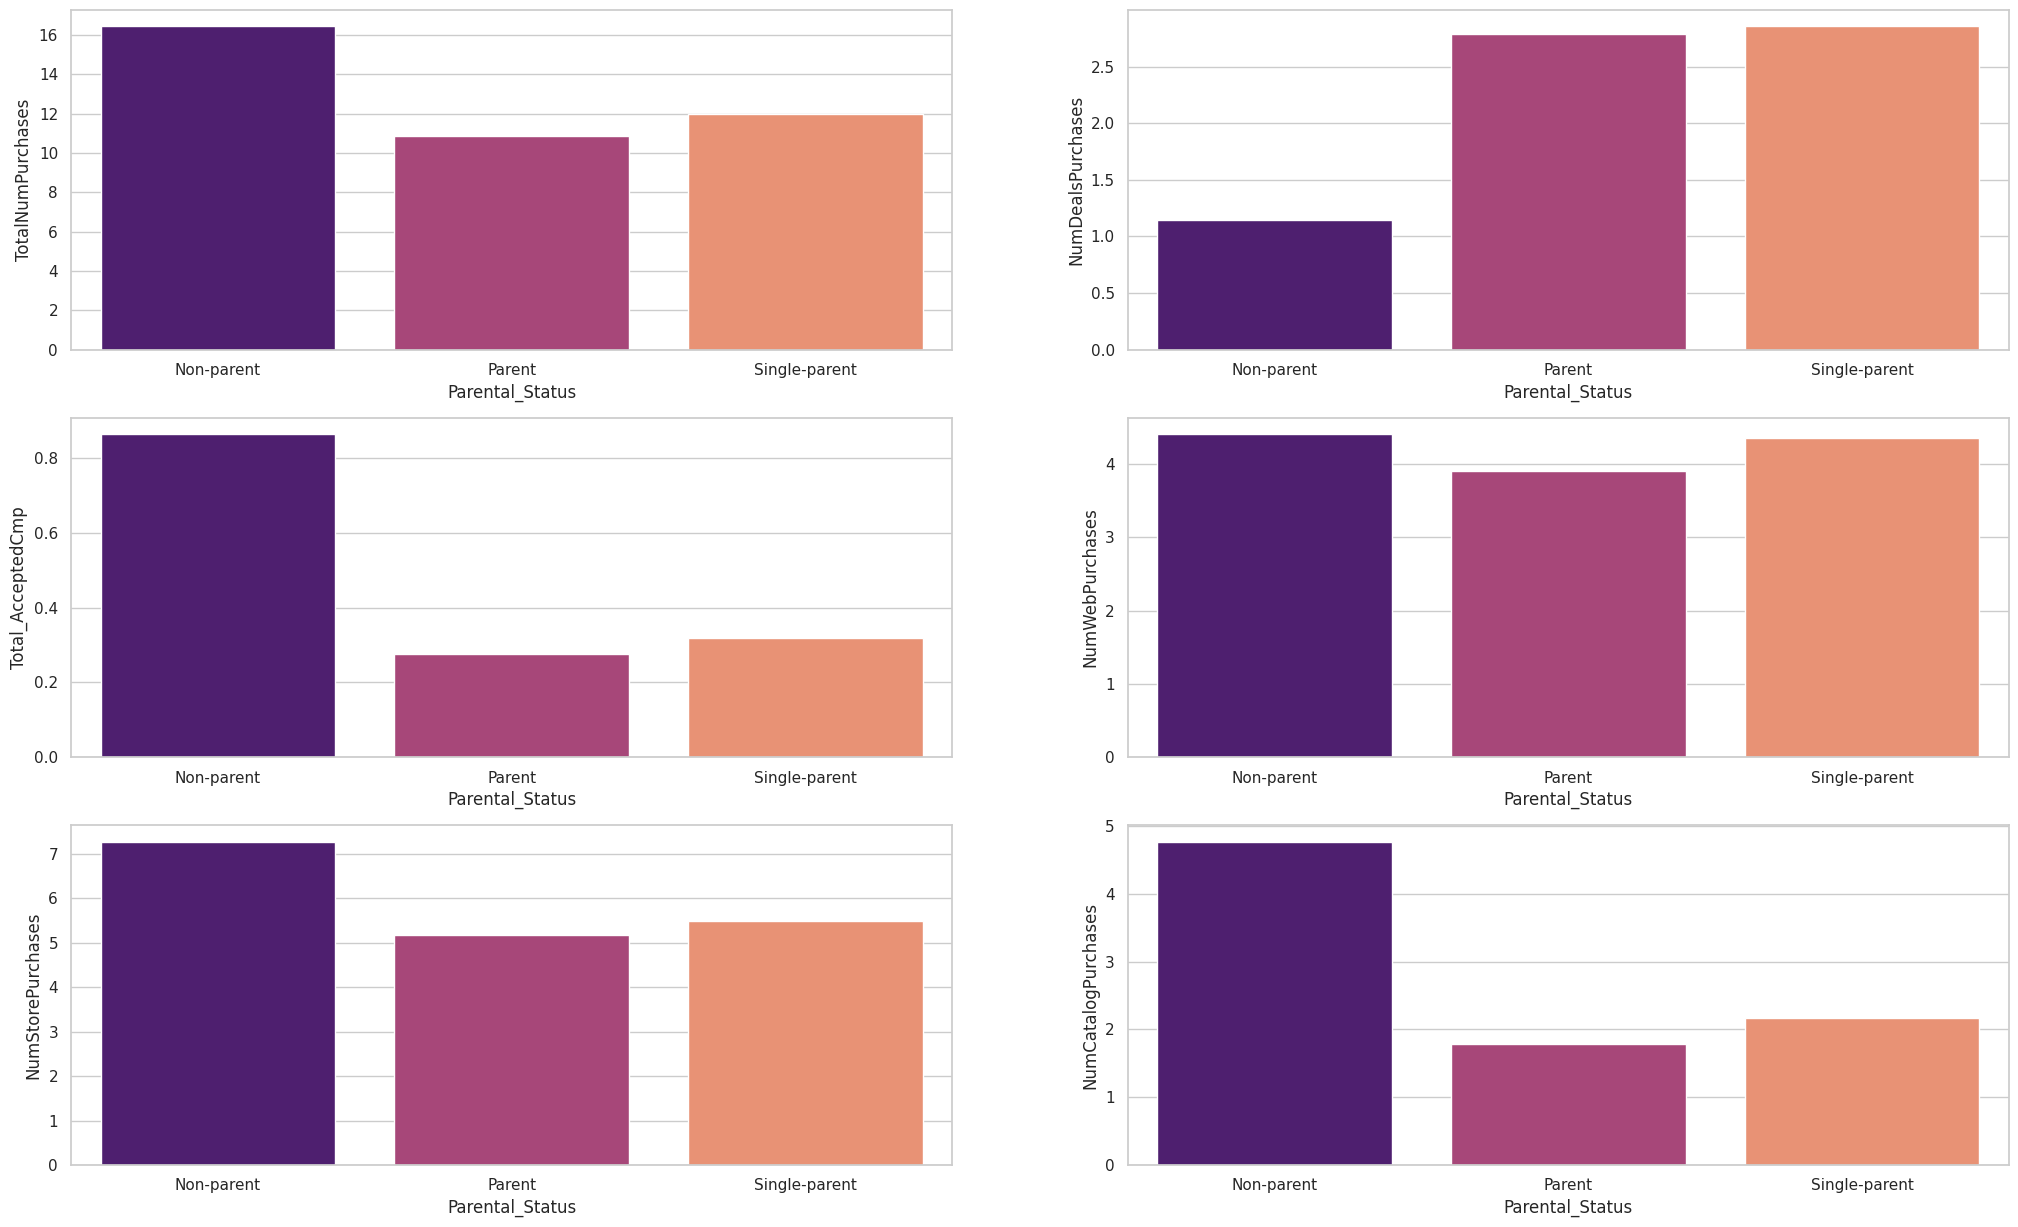

In [61]:
plotnumber=1
plt.figure(figsize=(25,15))
for col in ['TotalNumPurchases', 'NumDealsPurchases','Total_AcceptedCmp','NumWebPurchases','NumStorePurchases','NumCatalogPurchases']:
    ax = plt.subplot(3,2, plotnumber)
    sns.barplot(x=df['Parental_Status'], y=df[col], palette='magma', ci=0)
    plotnumber+=1;

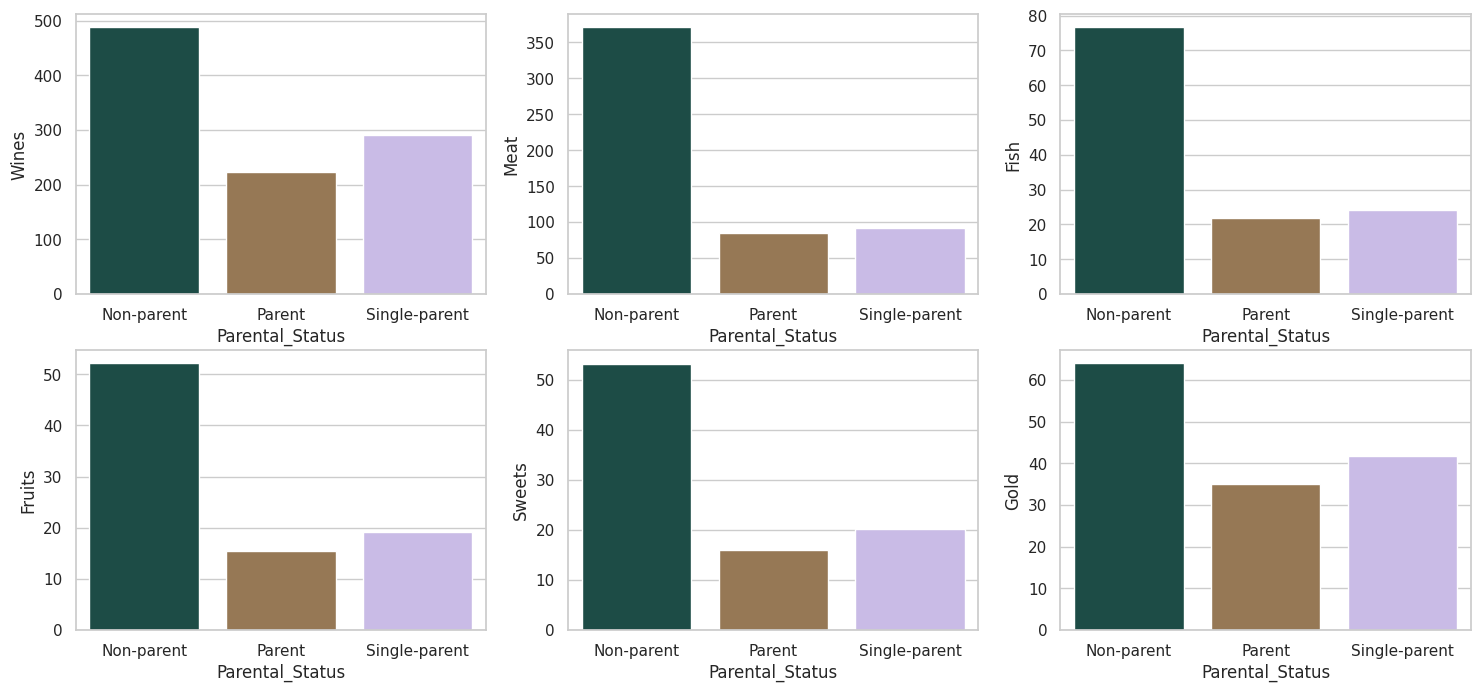

In [62]:
plotnumber=1
plt.figure(figsize=(18, 8))
for col in ['Wines', 'Meat', 'Fish', 'Fruits', 'Sweets', 'Gold']:
    ax = plt.subplot(2, 3, plotnumber)
    sns.barplot(x=df['Parental_Status'], y=df[col], ci=0, palette='cubehelix')
    plotnumber = (plotnumber % 6) + 1

Dari bar plot ini dapat dilihat bahwa 
* Data didominasi oleh pasangan yang hidup bersama dan memiliki anak sekitar 61%
* Kelompok yang bukan orang tua/tidak punya anak, memiliki income tertinggi dan menghabiskan uang paling banyak untuk berbelanja baik secara kuantitas maupun nilai transaksi. Selain itu kelompok non-parent juga menunjukkan transaksi tertinggi di seluruh lini penawaran, dibandingkan kelompok orang tua tunggal dan yang tidak memiliki anak.
* Golongan parent dan single-parent sering berbelanja dengan promo diskon, mereka mayoritas memiliki income menengah setelah golongan non-parent. Income terendah tampak pada golongan single parent
* Dari ketiga golongan ini, yang terbanyak menerima dan berbelanja dari marketing campaign adalah golongan non-parent.

####**E. Hubungan Antara Total Pengeluaran, Income, dan Jumlah Anak**

In [63]:
# Menampilkan median 'Income' berdasarkan jumlah 'Num_Children' customer
df.groupby('Num_Children', as_index=False)[['Income']].median()

,Num_Children,Income
0,0,72174.5
1,1,47215.5
2,2,44064.5
3,3,44277.0


Dapat dilihat bahwa untuk pelanggan yang belum memiliki anak menunjukkan median Income yang lebih tinggi dari kelompok lainnya. Kita juga akan melakukan uji Mann-Whitney untuk melihat apakah median Income pelanggan 2 anak vs 3 anak memiliki perbedaan signifikan atau tidak.

In [64]:
# Hypothesis
# Ho: Median 'Income' customer dengan 2 anak = median 'Income' customer dengan 3 anak
# Ha: Median 'Income' customer dengan 2 anak != median 'Income' customer dengan 3 anak

stat, pvalue = mannwhitneyu(
    df[df['Num_Children']== 2 ]['Income'],
    df[df['Num_Children']== 3 ]['Income']
)

if pvalue > 0.05:
    print(f"pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK terdapat cukup bukti bahwa median 'Income' pelanggan 2 anak != pelanggan 3 anak")
else:
    print(f"pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nKita punya cukup bukti bahwa median 'Income' pelanggan 2 anak != median 'Income' pelanggan 3 anak")

pvalue = 0.589457. pvalue > 0.05. Fail to reject Ho.
TIDAK terdapat cukup bukti bahwa median 'Income' pelanggan 2 anak != pelanggan 3 anak


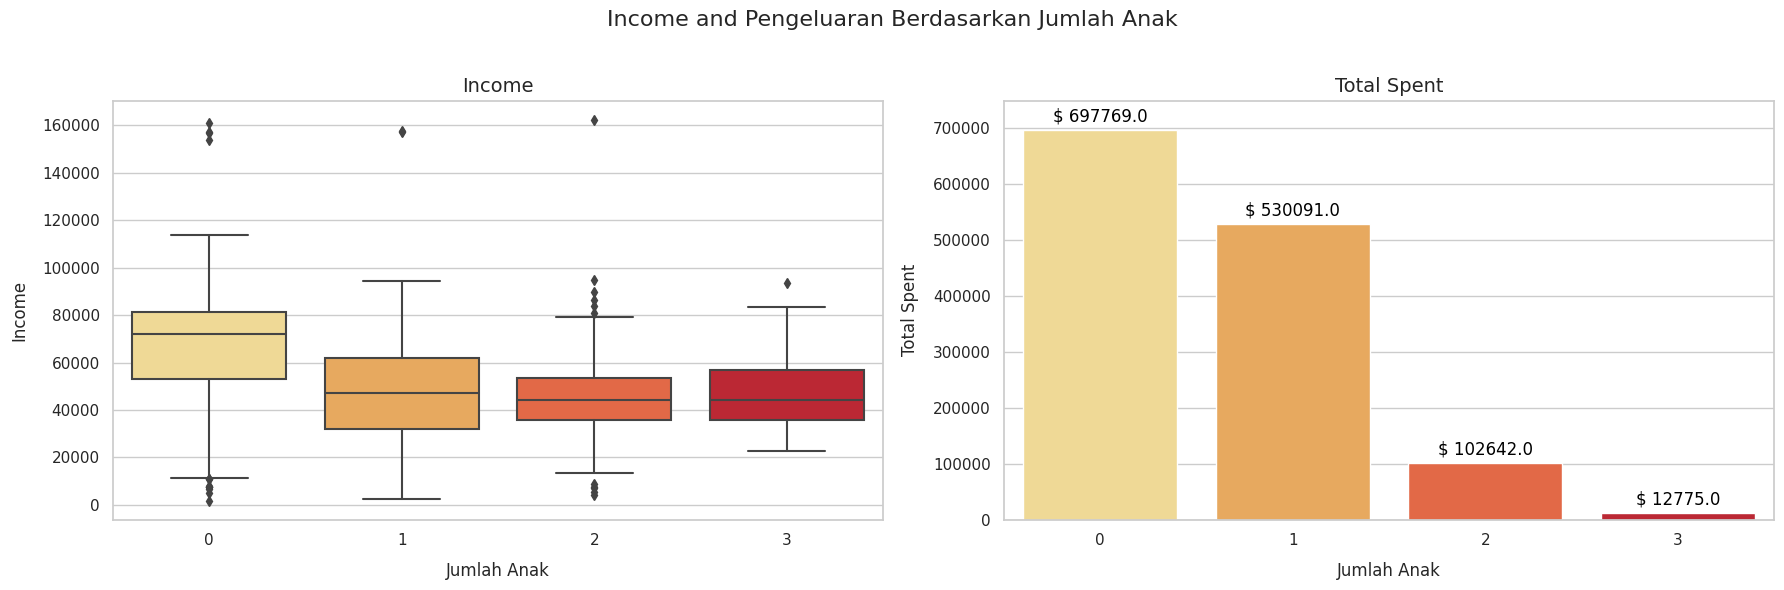

In [65]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Income and Pengeluaran Berdasarkan Jumlah Anak\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Num_Children', palette='YlOrRd')
plt.title('Income', size=14)
plt.xlabel('Jumlah Anak',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='TotalSpent', x= 'Num_Children', palette='YlOrRd', estimator=sum, ci=0)
plt.title('Total Spent', size=14)
plt.xlabel('Jumlah Anak',labelpad=10)
plt.ylabel('Total Spent',labelpad=10)
plt.ylim(0,750000)
for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout();

In [66]:
# Melihat Seberapa Kuat Korelasi antara 'TotalSpent', 'Income', dan 'Num_Children'
corr = df[['TotalSpent','Income','Num_Children']].corr('spearman').loc[['Num_Children']]
corr

,TotalSpent,Income,Num_Children
Num_Children,-0.483948,-0.375782,1.0


In [67]:
# Membuat fungsi untuk menentukan hubungan korelasi jika nilai (r) negatif
def arah_negative (nilai):
    if (nilai >= -0.2):
        return('Hubungan sangat lemah')
    elif (-0.2 >= nilai >= -0.4):
        return('Hubungan lemah')
    elif (-0.4 >= nilai >= -0.6):
        return('Hubungan moderate')
    elif (-0.6 >= nilai >= -0.8):
        return('Hubungan kuat')
    else:
        return('Hubungan sangat kuat')

print(f'Hasil Correlation Coefficient (r) Jumlah Anak vs Pengeluaran = {corr.iloc[:,0][0]:5f}')
print(f'{hubungan(corr.iloc[:,0][0])}')
print(f'Nilai {corr.iloc[:,0][0]:5f}: {arah_negative(corr.iloc[:,0][0])}')

Hasil Correlation Coefficient (r) Jumlah Anak vs Pengeluaran = -0.483948
Korelasi negatif
Nilai -0.483948: Hubungan moderate


In [68]:
print(f'Hasil Correlation Coefficient (r) Num_Children vs Income = {corr.iloc[:,1][0]:5f}')
print(f'{hubungan(corr.iloc[:,1][0])}')
print(f'Nilai {corr.iloc[:,1][0]:5f}: {arah_negative(corr.iloc[:,1][0])}')

Hasil Correlation Coefficient (r) Num_Children vs Income = -0.375782
Korelasi negatif
Nilai -0.375782: Hubungan lemah


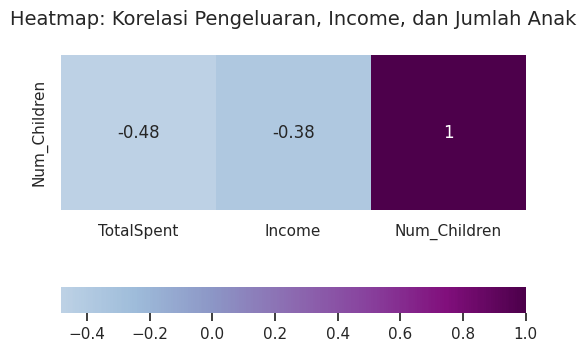

In [69]:
grid = {'height_ratios':(10,1), 'hspace':0.2}

fig, (ax_top,ax_bottom) = plt.subplots(nrows=2, figsize=(6,4), gridspec_kw=grid)
ax_top = sns.heatmap(
    corr,
    annot=True,
    ax=ax_top,
    cbar_ax=ax_bottom,
    cbar_kws={'orientation':'horizontal'},
    cmap='BuPu',
    center=0,
    square=True
)

ax_top.set_title('Heatmap: Korelasi Pengeluaran, Income, dan Jumlah Anak\n', size=14);

Dari chart dan hasil uji korelasi di atas:

* Jumlah anak dan pengeluaran, memiliki korelasi negatif (nilai correlation coefficient = -0.483948) dengan kekuatan hubungannya moderate.
Interpretasi: semakin banyak jumlah anak pelanggan, semakin sedikit pengeluarannya.

* Jumlah anak dan income, hubungannya negatif (nilai correlation coefficient = -0.375782) dan kekuatan hubungannya lemah.
Interpretasi: semakin banyak jumlah anak yang dimiliki customer, semakin kecil Income pelanggan tersebut.

* Variabel pengeluaran (Total Spent) memiliki hubungan lebih kuat dengan jumlah anak daripada variabel income.

###**3.3 Marketing Campaign Analysis**

####**A. Proporsi Total Banyaknya Transaksi Produk Berdasarkan Masing-masing Lini Penawaran (web, store, catalog)**

In [72]:
# Membuat list dari kolom 'NumWeb', 'NumCatalog', dan 'NumStore'
my_col1 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
my_col2 = ['TotalSpent','Age','Income','Num_Children','Total_AcceptedCmp']

# Membuat dataframe 'purchaseWay' berdasarkan list
purchaseWay = pd.DataFrame()
purchaseWay['Lini Penawaran'] = ['Web','Catalog','Store']
purchaseWay['Total Purchases'] = [df[col].sum() for col in my_col1]
purchaseWay['%'] = round(purchaseWay['Total Purchases']/purchaseWay['Total Purchases'].sum() * 100, 2)

# Menampilkan dataframe 'purchaseWay'
purchaseWay

,Lini Penawaran,Total Purchases,%
0,Web,9043,32.53
1,Catalog,5911,21.26
2,Store,12844,46.20


In [73]:
# Membuat dataframe korelasi pembelian berdasarkan lini penawaran dengan beberapa variabel 
corr_2 = df[['NumWebPurchases','NumStorePurchases','NumCatalogPurchases','TotalSpent','Age','Income','Num_Children','Total_AcceptedCmp']].corr('spearman')

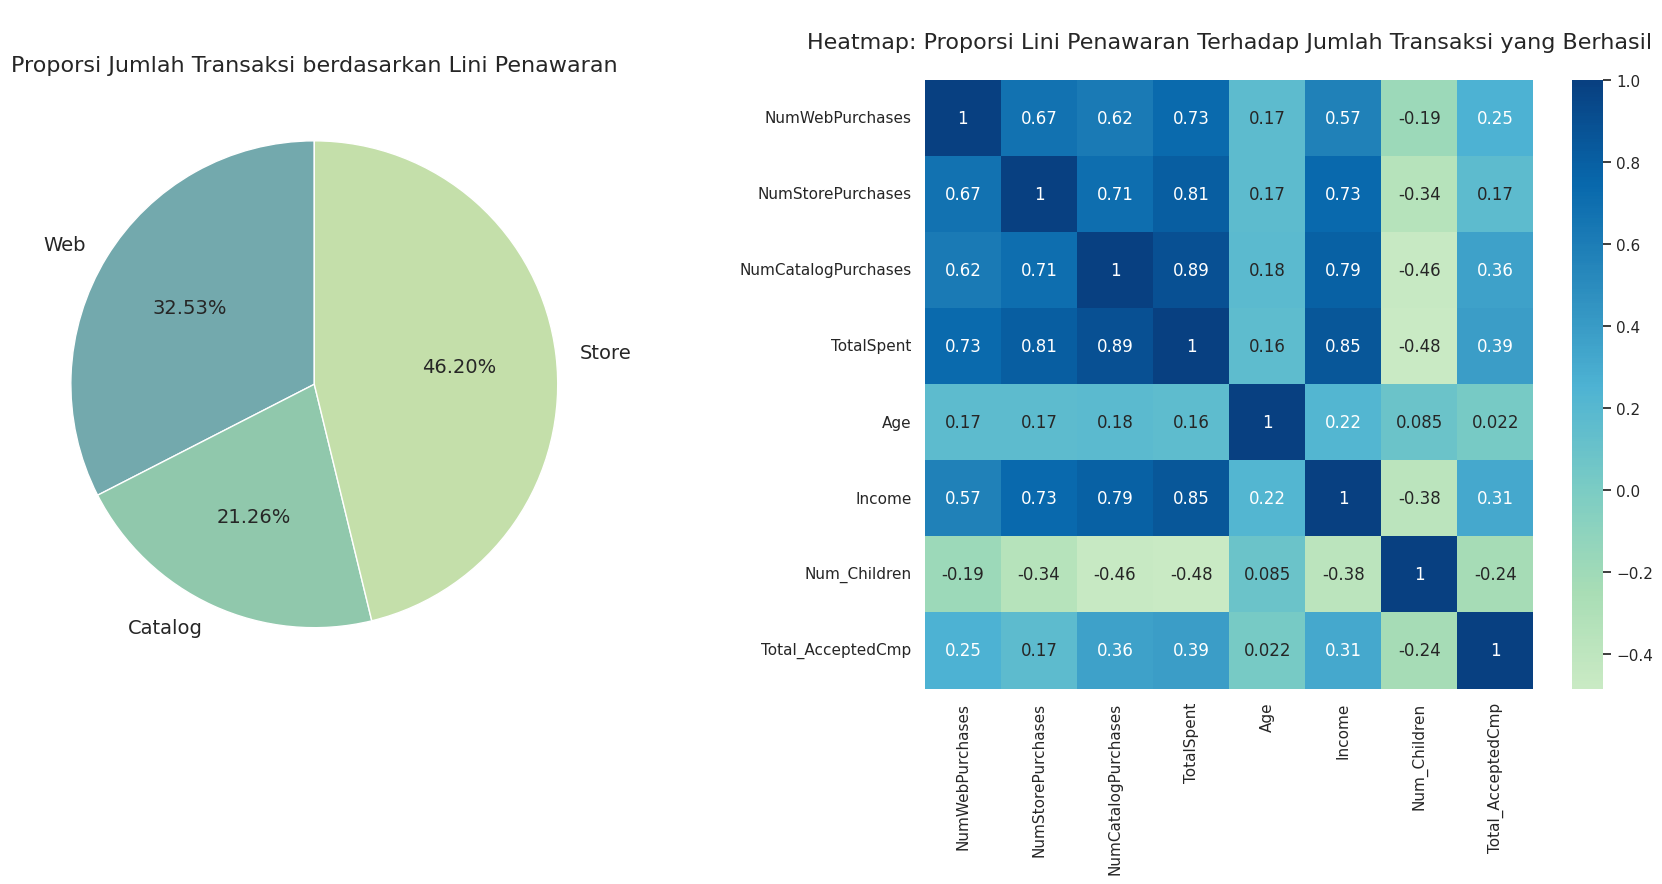

In [74]:
# Menampilkan pie chart
myColor = ['#73A9AD', '#90C8AC', '#C4DFAA']

plt.figure(figsize=(18,8),facecolor='white')

plt.subplot(1,2,1)
plt.pie(
    x=purchaseWay['%'],
    labels=purchaseWay['Lini Penawaran'],
    autopct=f'%.2f%%',
    startangle=90,
    textprops={'fontsize': 14},
    colors= myColor)
plt.title('Proporsi Jumlah Transaksi berdasarkan Lini Penawaran', size=16)

# Menampilkan heatmap 
plt.subplot(1,2,2)
plt.title('\nHeatmap: Proporsi Lini Penawaran Terhadap Jumlah Transaksi yang Berhasil\n', size=16)
sns.heatmap(corr_2, center=0, annot=True, cmap='GnBu', square=True)

plt.tight_layout();

Berdasarkan grafik diatas, kita dapat mengetahui bahwa:

* Proporsi pembelian terbesar adalah melalui Store (46.20%)
* Proporsi pembelian terkecil adalah melalui Catalog (21.26%)

Setelah ini, perlu dilakukan uji korelasi untuk melihat hubungan total purchase berdasarkan lini penawaran dengan variabel lain. Dari hasil uji korelasi dan grafik heatmap diatas, didapatkan insight berupa:

* Variabel yang memiliki korelasi positif terkuat adalah NumCatalogPurchases dengan Income = 0.79
* Variabel yang memiliki korelasi negatif terkuat adalah NumCatalogPurchases dengan Num_Children = -0.46
* Dari penjelasan diatas dapat diinterpretasikan bahwa pelanggan lebih banyak yang berbelanja langsung ke Store daripada berbelanja via web dan catalog.
* Belanja catalog memiliki korelasi positif terkuat dengan total spent = 0.89. Artinya meskipun jumlah transaksi dengan catalog paling sedikit, nilai transaksi yang dihasilkan paling besar.
* Belanja melalui catalog memiliki hubungan korelasi positif yang kuat dengan kelas pendapatan, di mana semakin tinggi pendapatan maka semakin tinggi jumlah transaksi via catalog.
* Pada matriks korelasi sebelumnya, terlihat  produk best-seller seperti wines dan meat lebih banyak dibeli via catalog. Ini berarti perusahaan dapat memasarkan produk dengan harga yang cukup tinggi dengan catalog.
* Baik lini penawaran store, web, maupun catalog memiliki hubungan korelasi negatif dengan jumlah anak, artinya bila pelanggan memiliki banyak anak justru uang yang dikeluarkan untuk belanja lebih sedikit daripada kelompok non-parent.

In [ ]:
# Table summary dari total purchase berdasarkan lini penawaran, Segmen Usia, dan Jumlah Anak
display(df.groupby('Income_Class').sum().iloc[:,14:17].T, df.groupby('Num_Children').sum().iloc[:,13:16].T)

Income_Class,Low,Middle,High
NumWebPurchases,1112,4991,2940
NumCatalogPurchases,263,2484,3164
NumStorePurchases,1637,6569,4638


Num_Children,0,1,2,3
NumWebPurchases,2785,4765,1352,141
NumCatalogPurchases,3013,2395,453,50
NumStorePurchases,4595,6260,1801,188


####**B. Hubungan Segmen Pendidikan dengan Lini Penawaran**

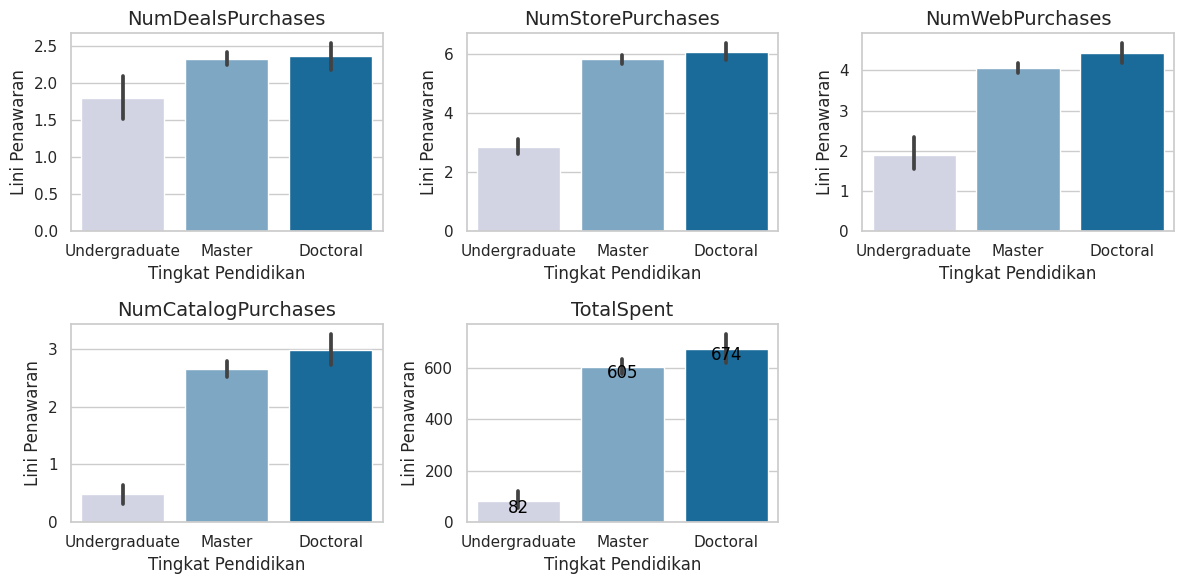

In [75]:
plt.figure(figsize=(12,6))

eduOrder = ['Undergraduate', 'Master','Doctoral']

for i, col in enumerate(['NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases','TotalSpent']):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=df, x='Edu_Segment', y=col, order=eduOrder, palette='PuBu')
    plt.title(col, fontsize=14)
    plt.xlabel('Tingkat Pendidikan', fontsize=12)
    plt.ylabel('Lini Penawaran', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=12)

plt.tight_layout()
plt.show()

Pada bar plot di atas, terlihat bahwa:

* Segmen pelanggan dengan tingkat pendidikan doctoral atau PhD berbelanja paling banyak di semua lini penawaran, baru kemudian segmen pendidikan master dan terakhir undergraduate.
* Oleh karena itu, pelanggan berstatus pendidikan doctoral juga memiliki total pengeluaran tertinggi.
* Pelanggan berpendidikan doctoral juga menunjukkan tingkat respon paling tinggi terhadap promo diskon. 
* Dari segi jumlah populasi, menurut pie chart sebelumnya yang menunjukkan karakteristik pelanggan berdasarkan background pendidikan, populasi pelanggan terbanyak adalah pendidikan master 75,9%, lalu doctoral 21,7%, terakhir undergraduate 2,4%.

####**C. Respon pelanggan terhadap marketing campaign yang telah dilakukan**

In [76]:
# Persentase jumlah pelanggan yang berpartisipasi minimal 1 kali dan yang tidak sama sekali
accCmp1 = pd.Series(data=['Yes' if i > 0 else 'No' for i in df['Total_AcceptedCmp']]).value_counts().to_frame().reset_index().rename(columns={0:'Total','index':'Accepted Cmp'})
accCmp1['%'] = round(accCmp1['Total']/accCmp1['Total'].sum()*100,2)
accCmp1

,Accepted Cmp,Total,%
0,No,1608,72.69
1,Yes,604,27.31


In [77]:
# Frekuensi partisipasi pelanggan dari 0 hingga angka maksimum yang ada pada data, dan jumlah partisipan di masing-masing segmen
df['Total_AcceptedCmp'].value_counts().to_frame().reset_index().rename(columns={'Total_AcceptedCmp':'Total','index':'Num_AcceptedCmp'})

,Num_AcceptedCmp,Total
0,0,1608
1,1,368
2,2,139
3,3,51
4,4,36
5,5,10


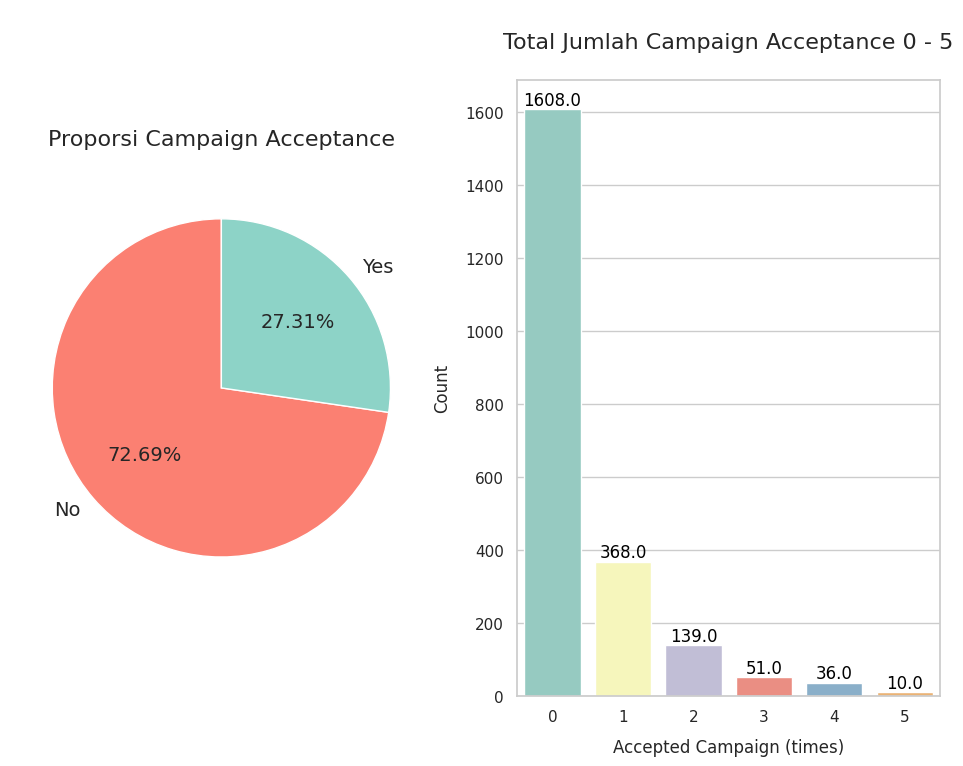

In [78]:
myColor = ['#fb8072', '#8dd3c7']

plt.figure(figsize=(12,8),facecolor='white')

plt.subplot(1,2,1)
plt.pie(
    x=accCmp1['%'],
    labels=accCmp1['Accepted Cmp'],
    autopct=f'%.2f%%',
    startangle=90,
    textprops={'fontsize': 14},
    colors= myColor
)
plt.title('\nProporsi Campaign Acceptance\n',size=16)

plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='Total_AcceptedCmp', palette='Set3')
plt.title('\nTotal Jumlah Campaign Acceptance 0 - 5\n',size=16)
plt.xlabel('Accepted Campaign (times)',labelpad=10)
plt.ylabel('Count',labelpad=10)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center', va='top', color='black', size=12)

plt.tight_layout;

Frekuensi maksimal pelanggan merespon campaign adalah 5 kali, dari total 6 campaign yang masing-masing dilakukan selama periode waktu tertentu dan mungkin sudah dilihat berulang kali oleh pelanggan.

Ada 72,69% pelanggan yang tidak merespon campaign sama sekali dan 27,1% yang memberi respon bervariasi. Sebanyak 368 orang merespon hanya 1 kali, 139 merespon 2 kali, begitu seterusnya. Terakhir, hanya 10 orang pelanggan yang merespon campaign hingga 5 kali. 

Kita akan melihat lebih detail dalam acceptance rate dan jumlah pelanggan yang menjadi partisipan pada masing-masing campaign.

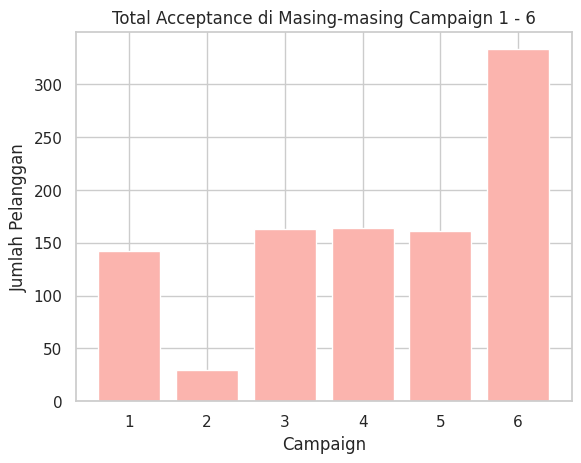

In [79]:
campaign = ['1','2','3','4','5','6']
sumcampaign = [df['AcceptedCmp1'].sum(),df['AcceptedCmp2'].sum(),df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(),df['AcceptedCmp5'].sum(),df['AcceptedCmp6'].sum()]
plt.bar(campaign, sumcampaign)
plt.title('Total Acceptance di Masing-masing Campaign 1 - 6')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Campaign')
plt.show()

Respon/partisipasi pelanggan terbanyak diperoleh pada campaign ke-6 (terakhir) yakni mencapai lebih dari 300 partisipan.

In [81]:
for i in range(1, 7):
    acceptance_rate = (df[f'AcceptedCmp{i}'].sum() / len(df)) * 100
    print(f'Acceptance rate campaign {i} sebesar {acceptance_rate:0.1f} %')


Acceptance rate campaign 1 sebesar 6.4 %
Acceptance rate campaign 2 sebesar 1.4 %
Acceptance rate campaign 3 sebesar 7.4 %
Acceptance rate campaign 4 sebesar 7.4 %
Acceptance rate campaign 5 sebesar 7.3 %
Acceptance rate campaign 6 sebesar 15.1 %


Acceptance rate menunjukkan kondisi menurun, lalu naik mencapai 7% dan stagnan hingga campaign kelima. Namun tampaknya ada perbaikan yang  signifikan di campaign terakhir sehingga acceptance rate naik pesat hingga 15.1%. Untuk mengetahui apakah angka ini merepresentasikan keberhasilan campaign tersebut, maka harus dibandingkan dengan rata-rata acceptance rate dari bisnis lain di industri dan niche yang sejenis.

Kita memerlukan informasi mengenai periode waktu tiap campaign, platform yang digunakan, dan jumlah transaksi yang terkait dengan campaign acceptance.

**Menghitung Conversion Rate**

Kita dapat menghitung conversion rate dari informasi kunjungan web dan transaksi via web, serta conversion rate dari campaign acceptance (jumlah campaign yang direspon) di masing-masing campaign. Namun kita membutuhkan informasi yang lebih lengkap.

Conversion rate bergantung pada banyak faktor seperti periode campaign, jumlah campaign yang dikirim, platform yang digunakan, serta jumlah orang yang melakukan pembelian setelah menerima campaign. Tanpa rincian informasi tersebut, perhitungan conversion rate akan bersifat asumsi atau perkiraan, dan hasilnya mungkin tidak akurat atau bermanfaat untuk mengambil keputusan bisnis yang tepat. Oleh karena itu, penting untuk memastikan bahwa data yang diperoleh lengkap dan akurat sebelum melakukan perhitungan conversion rate.

####**D. Gambaran pertumbuhan pelanggan baru berdasarkan bulan**

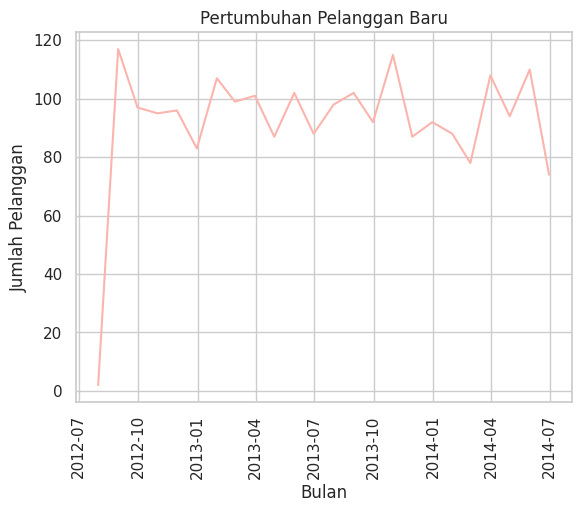

In [83]:
# Menghitung jumlah pelanggan baru per bulan
monthlyNewCust = df.groupby(pd.Grouper(key='Dt_Customer', freq='M')).size()

# Membuat plot grafik garis
plt.plot(monthlyNewCust.index, monthlyNewCust.values)

# Memberi judul pada grafik
plt.title('Pertumbuhan Pelanggan Baru')

# Memberi label pada sumbu x dan y
plt.xlabel('Bulan')
plt.xticks(rotation=90, ha='center')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan grafik
plt.show()

Pola pertumbuhan pelanggan baru menunjukkan penurunan setiap bulan Desember yang semestinya merupakan momen high season. Pola kenaikannya tidak menentu, sehingga perlu diteliti lebih lanjut apakah bertepatan dengan adanya promo diskon atau hari besar tertentu sesuai dengan sosiodemogeografi pelanggan yang potensial bagi perusahaan. 

####**E. Identifikasi Pelanggan Berdasarkan Value Untuk Personalisasi Campaign**
Perlu dilakukan analisis RFM yang merupakan sebuah singkatan dari recency, frequency, dan monetary value.

RFM analysis dapat membantu untuk meningkatkan pendapatan dengan menargetkan kelompok tertentu dari pelanggan. Dengan menerapkan analisis ini, maka segmentasi pelanggan akan lebih terpersonalisasi, menyesuaikan perilaku pelanggan pada transaksi di waktu sebelumnya.

In [84]:
# Membuat kolom baru dengan nama frequency & monetary
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['Monetary'] = df['TotalSpent'] 
df[['ID','Recency','Frequency','Monetary']].head()

,ID,Recency,Frequency,Monetary
0,5524,58,32,1617
1,2174,38,11,27
2,4141,26,25,776
3,6182,26,14,53
4,5324,94,24,422


Kolom Frequency berisi jumlah dari banyaknya pembelian dengan diskon + banyaknya pembelian melalui website + banyaknya pembelian melalui katalog + banyaknya pembelian melalui toko. 
Kolom Monetary berisi nilai TotalSpent yang diperoleh dari penjumlahan nilai transaksi Wines + Fruits + Meat + Fish + Sweet + Gold

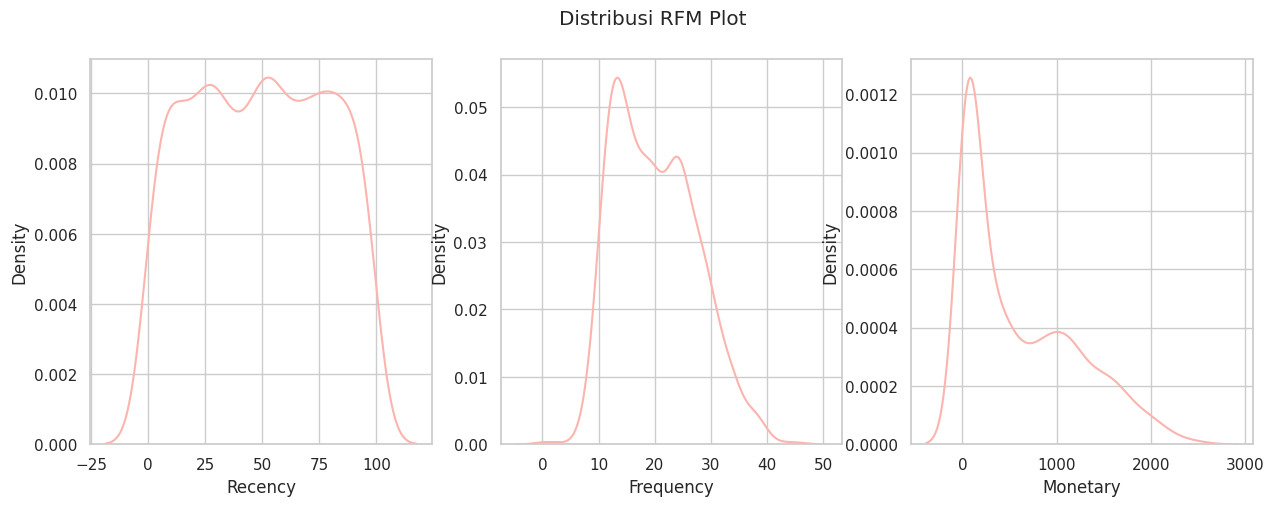

In [85]:
# Visualisasi grafik distribusi dari Recency, Frequency, dan Monetary
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.Figure(figsize=(8,6))
sns.kdeplot(data=df, x='Recency', ax=axs[0])
sns.kdeplot(data=df, x='Frequency', ax=axs[1])
sns.kdeplot(data=df, x='Monetary', ax=axs[2])
plt.suptitle('Distribusi RFM Plot')
plt.ticklabel_format(useOffset=False) 
plt.show()

Selanjutnya tambahkan kolom baru pada data frame yang berisi nilai ranking (peringkat) dari variabel "Recency", "Frequency", dan "Monetary" secara terpisah, serta menormalisasikan nilai ranking tersebut agar memiliki rentang nilai antara 0 hingga 100. Hal ini berguna untuk mempermudah analisis dan perbandingan antara tiga variabel tersebut.

In [87]:
df['R_rank'] = df['Recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)

df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['F_rank_norm'] = (df['F_rank']/df['F_rank'].max())*100
df['M_rank_norm'] = (df['F_rank']/df['M_rank'].max())*100
df.head()

,ID,Age,Age_Segment,Edu_Segment,Marital_Status,Parental_Status,Num_Children,Income,Income_Class,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalSpent,TotalNumPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Total_AcceptedCmp,Complain,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,5524,57,Older,Master,Single,Non-parent,0,58138.0,Middle,2012-09-04,58,635,88,546,172,88,88,1617,22,7,8,10,4,3,0,0,0,0,0,1,1,0,32,1617,893.0,2069.5,2034.5,40.618604,93.557866,93.579019
1,2174,60,Older,Master,Single,Parent,2,46344.0,Middle,2014-03-08,38,11,1,6,2,1,6,27,4,5,1,1,2,2,0,0,0,0,0,0,0,0,11,27,1347.0,172.5,154.0,61.269047,7.798373,7.800136
2,4141,49,Middle-Age,Master,Together,Non-parent,0,71613.0,High,2013-08-21,26,426,49,127,111,21,42,776,20,4,8,2,10,1,0,0,0,0,0,0,0,0,25,776,1618.0,1619.0,1426.0,73.595633,73.191682,73.208230
3,6182,30,Adult,Master,Together,Parent,1,26646.0,Low,2014-02-10,26,11,4,20,10,3,5,53,6,6,2,0,4,2,0,0,0,0,0,0,0,0,14,53,1618.0,552.0,412.5,73.595633,24.954792,24.960434
4,5324,33,Adult,Doctoral,Married,Parent,1,58293.0,Middle,2014-01-19,94,173,43,118,46,27,15,422,14,5,5,3,6,5,0,0,0,0,0,0,0,0,24,422,112.5,1515.5,1143.0,5.117125,68.512658,68.528148


In [88]:
# Rumus skor rfm: 0,15*Recency + 0,28*Frequency + 0,57 *Monetary
df['RFM_Score'] = 0.15*df['R_rank_norm']+0.28 * \
    df['F_rank_norm']+0.57*df['M_rank_norm']
df['RFM_Score'] *= 0.05
df = df.round(2)
df[['ID', 'RFM_Score']].head()

,ID,RFM_Score
0,5524,4.28
1,2174,0.79
2,4141,3.66
3,6182,1.61
4,5324,2.95


RFM Score dibagi menjadi beberapa segment :

* rfm score > 4.5 : Top Customer
* rfm score > 4 : High Value Customer
* rfm score > 3 : Medium value customer
* rfm score> 1.6 : Low-value customer
* rfm score< 1.6 :Lost Customer

In [89]:
df['Customer_segment'] = np.where(df['RFM_Score'] > 4.5, "Top Customers",
                        (np.where(df['RFM_Score'] > 4,"High value Customer",
                        (np.where(df['RFM_Score'] > 3, "Medium Value Customer", 
                        np.where(df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
df[['ID', 'RFM_Score', 'Customer_segment']].head(10)

,ID,RFM_Score,Customer_segment
0,5524,4.28,High value Customer
1,2174,0.79,Lost Customers
2,4141,3.66,Medium Value Customer
3,6182,1.61,Low Value Customers
4,5324,2.95,Low Value Customers
5,7446,4.19,High value Customer
6,965,3.91,Medium Value Customer
7,6177,2.35,Low Value Customers
8,4855,1.90,Low Value Customers
9,5899,2.79,Low Value Customers


In [90]:
counts = df['Customer_segment'].value_counts()

# Menghitung persentase tiap value
percentages = counts / len(df) * 100
print(percentages)

Low Value Customers      32.911392
Lost Customers           29.023508
Medium Value Customer    23.824593
High value Customer      10.714286
Top Customers             3.526221
Name: Customer_segment, dtype: float64


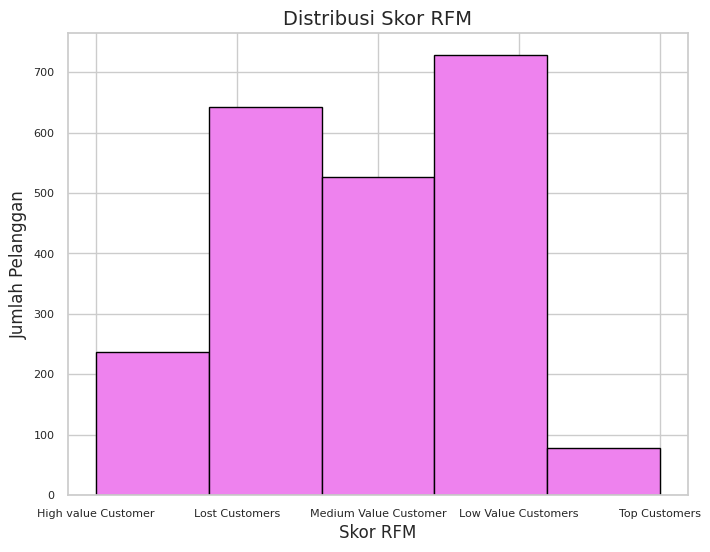

In [91]:
plt.figure(figsize=(8,6))
plt.hist(df['Customer_segment'], bins=5, edgecolor='black', color='violet')
plt.xlabel('Skor RFM', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.title('Distribusi Skor RFM', fontsize=14)

plt.tick_params(labelsize=8)
plt.show()


# Visualisasi distribusi skor RFM

Berdasarkan skor RFM serta bar plot di atas:

* Perusahaan memiliki top customer sekitar 3,5% dan high value customer 10,7%.
* Perusahaan kehilangan pelanggan sebanyak 29%. 
* Pelanggan low value yang jarang berbelanja, yakni sebesar 32% di mana merupakan angka tertinggi di data pelanggan.
* Dengan data ini, perusahaan dapat mengidentifikasi value pelanggan yang ditarget untuk campaign, pemberian badge, reward, diskon, atau promo dengan mencocokkan ID pelanggan tersebut pada database perusahaan.
* Pelanggan yang ID-nya tidak terintegrasi dengan skor RFM ini, berarti perlu didorong untuk mengisi atau memperbaiki data yang missing, keliru, dan outlier dalam dataset.
* Perhitungan skor RFM perlu dilakukan secara berkala untuk mengetahui apakah pemberian treatment secara lebih personal sesuai segmen pelanggan memberikan hasil yang diharapkan pada pertumbuhan perusahaan.

###**4. Kesimpulan**

Setelah dilakukan serangkaian analisis pada dataset pelanggan, maka dapat disimpulkan bahwa:

* Usia dan income pelanggan memiliki hubungan yang signifikan. Total pengeluaran dan Income pelanggan berkorelasi positif dan hubungannya sangat kuat, makin tinggi income maka makin besar pengeluaran.
* Mayoritas pelanggan datang dari segmen usia Adult dan kelas Middle income. Di mana kelompok Adult memiliki kelas middle, high, dan low income terbanyak dibanding yang lain.
* Mayoritas pelanggan datang dari background pendidikan Master, serta merupakan pasangan yang hidup bersama dan memiliki anak (kelompok parent).
* Kelompok Non-parent memiliki income tertinggi dan jumlah transaksi tertinggi di seluruh lini penawaran. Mereka juga merupakan populasi terbanyak yang merespon campaign.
* Jumlah anak berkorelasi negatif dengan income dan pengeluaran pelanggan. Semakin banyak jumlah anak, semakin kecil Income pelanggan tersebut, begitu juga dengan nilai pengeluarannya semakin kecil.
* Nilai transaksi paling tinggi berasal dari catalog, meskipun kuantitas penjualan melalui catalog paling sedikit. Jumlah penjualan terbanyak adalah melalui store langsung. 
* Produk best-seller adalah wines dan meat yang paling banyak dibeli via catalog. Umumnya kedua produk tersebut memiliki harga jual cukup tinggi.
* Belanja melalui catalog memiliki korelasi positif kuat dengan kelas pendapatan, makin tinggi pendapatan maka makin tinggi jumlah transaksi via catalog.
* Baik lini penawaran store, web, maupun catalog memiliki hubungan korelasi negatif dengan jumlah anak, bila pelanggan memiliki banyak anak justru uang yang dikeluarkan untuk belanja produk kita lebih sedikit daripada kelompok non-parent.
* Golongan parent dan single-parent sering berbelanja dengan promo diskon. Kelompok parent memiliki income nomer dua terbanyak setelah golongan non-parent. 
* Segmen pelanggan dengan tingkat pendidikan doctoral atau PhD berbelanja paling banyak baik melalui store, web, maupun catalog. Kelompok doctoral juga menunjukkan respon paling tinggi terhadap campaign, diskon, serta memiliki total pengeluaran tertinggi.
* Dilihat dari jumlah populasi, segmen pelanggan terbesar adalah Master hingga mencapai 75,9%, baru kemudian Doctoral 21,7% dan sisanya Undergraduate.
* Dari 6 campaign yang dilakukan, 27,31% berhasil menarik respon pelanggan. Dengan acceptance rate campaign pertama sekitar 6,4% dan campaign terakhir  15%. Data ini menunjukkan bahwa campaign tersebut tingkat penerimaannya telah naik secara signifikan. Namun tidak ada informasi mengenai campaign seperti apa yang dilakukan, periode waktu, dan target pelanggan yang dituju.
* Pola pertumbuhan pelanggan baru menunjukkan penurunan setiap akhir tahun (bulan Desember). Pola kenaikan tidak menentu, sehingga diperlukan informasi tambahan untuk tahu apakah kenaikan jumlah pendaftaran bertepatan dengan adanya promo atau hari besar tertentu sesuai dengan sosiodemografi pelanggan potensial.
* Perusahaan memiliki top customer sekitar 3,5% dan high value customer 10,7%. 
* Pelanggan terbanyak berada pada kategori low value sebesar 32%. Persentase pelanggan yang hilang mencapai 29%. 


###**5. Rekomendasi**

1. Karena penjualan paling banyak terjadi di store langsung, perusahaan perlu memberikan pengalaman belanja yang menyenangkan dan dapat dijangkau oleh semua kalangan. Misalnya menyediakan playground, pertunjukan, taman indoor, food corner, fasilitas toilet dan parkir yang memadai. 

2. Penggunaan online campaign saat ini dapat menarget lebih banyak pelanggan baru. Perusahaan perlu membuat landing page untuk meningkatkan kunjungan dan transaksi via web, dengan dibantu Google Ads. Selain itu juga beriklan melalui e-commerce dan social media. 

3. Dengan mengetahui segmen usia mana yang lebih tertarik pada suatu produk, kita dapat menerapkan filter usia untuk beriklan. Misalnya kelompok Adult yang berpendidikan doctoral adalah kelompok paling potensial, dengan daya beli tertinggi dilihat dari besaran income dan cukup royal berbelanja. Kita dapat mengirim campaign berupa produk dengan harga tinggi yang bestseller seperti wines dan meat. Campaign yang dibuat mesti informatif dan sesuai untuk orang dewasa yang  berpendidikan tinggi. 

4. Gunakan catalog untuk menjual produk dengan harga tinggi, package, hampers, dan produk eksklusif untuk menyasar pelanggan berpenghasilan tinggi. Dapat disebarkan dalam bentuk catalog fisik, online Ads, atau dikirim bersama newsletter.

5. Apabila ingin memperluas jangkauan pasar, tingkatkan campaign pada kelompok yang total transaksinya paling rendah, yakni kelompok usia Middle-Age, Parent, dan Single parent dengan menggunakan promo diskon yang mereka sukai. Tidak lupa juga tingkatkan marketing campaign kepada seluruh existing customer.

6. Perusahaan perlu melengkapi informasi untuk campaign yang akan dilakukan di masa depan, guna menarik analisis yang akurat dan tepat guna. Seperti periode waktu, platform, campaign goal, target pelanggan, pengeluaran untuk campaign, serta nilai transaksi tiap pelanggan yang merespon campaign.

7. Tambah jenis produk yang dijual agar bervariasi, terutama yang dapat menarik pembeli berpenghasilan low dan middle. Mulai dari produk kebutuhan pokok seperti sembako, sampai produk yang spesifik menyasar segmen tertentu misalnya perlengkapan anak dan perawatan tubuh.

8. Berikan badge pada setiap pelanggan yang menunjukkan nomer ID mereka. Badge dapat diakses dalam bentuk kartu fisik, atau akun membership di web dan platform milik perusahaan. Badge tersebut untuk memberi reward sesuai tingkat loyalitas pelanggan. Makin tinggi levelnya, makin banyak dan besar peluang untuk mendapat reward berupa diskon, cashback, dsb. 

9. Terapkan campaign menjelang hari perayaan dan hari belanja nasional, seperti promo Lebaran, CNY, Natal, 11.11, Harbolnas, Thanksgiving, dsb.
